# A2: Regression Model Development

 - Student: **Yunsik Choung**

In [1]:
import time
startTime = time.time()

***
# Preparing Dataset

In [1]:
# import Relative Libraries
import numpy as np # numpy for mathmatical calculating 
import pandas as pd # Data Science Essential
import seaborn as sns # Visualizing Results
import matplotlib.pyplot as plt # Basic Chart Library

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Data Set Location Path
file = './Apprentice_Chef_Dataset_2023.xlsx'

# Read dataset to convert Pandas DataFrame
df = pd.read_excel(io = file, 
                   header = 0, # First Column as a Header
                   sheet_name = 'raw_data', # Select Sheet
                  ) 
# Changing Column name 'LATE_DELIVERIES ' to 'LATE_DELIVERIES'
df['LATE_DELIVERIES'] = df['LATE_DELIVERIES ']

# Drop Existing 'LATE_DELIVERIES ' Column
df = df.drop('LATE_DELIVERIES ', axis=1)

# Check dataset Total Observations and Columns
print(f"""
Data Validating -----------------
Total Observations: {df.shape[0]}
Total Columns     : {df.shape[1]}
---------------------------------

Head Data
---------
""")
df.head(n = 5)


Data Validating -----------------
Total Observations: 1946
Total Columns     : 19
---------------------------------

Head Data
---------



,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,LATE_DELIVERIES
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,137.41,6,2.894737,456,0
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,120.20,5,2.631579,680,0
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,127.00,3,3.684211,145,0
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,129.78,6,3.157895,418,0
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,34.42,3,3.157895,174,0


## Check Missing Values
 - FAMILY_NAME column has 46 missing Values.
 - It is a categorical variable and this study did not use this variable.
 - This study decides to keep those left. Assume that these do not need to be handled.

In [3]:
# Missing Value Check
df.isna().any() # FAMILY_NAME column has some missing values

# Check details of missing values
print(f"""
-------------------------------------
Missing Value Column: {df.columns[df.isna().any()].values}
Missing Vlaue Counts: {df['FAMILY_NAME'].isna().sum()}

""")


-------------------------------------
Missing Value Column: ['FAMILY_NAME']
Missing Vlaue Counts: 46




In [4]:
# Check detail observation which has missing values on FAMILY_NAME
df[df.isna().sum(axis=1) == 1]

# It seems like it does not matter if it has missing values on Family Name.
unique_family_name = len(df['FAMILY_NAME'].value_counts())
total_obs = len(df)

print(f"""
-------------------------------------
Total Unique Family Name Counts: {unique_family_name}
Total Observations Counts      : {total_obs}
Proportion                     : {round(unique_family_name/total_obs, 3)}
""")


-------------------------------------
Total Unique Family Name Counts: 1070
Total Observations Counts      : 1946
Proportion                     : 0.55



## Checking Descriptive Statistics
 - The dataset has four Object Columns and 15 numeric columns.

In [5]:
# Check Data frame Information
df.info(verbose=True) # 4 Objective Columns & 15 numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

### Object Type Columns
 - The dataset has four Object type columns, NAME, EMAIL, FIRST_NAME, and FAMILY_NAME.
 - All object-type columns are not categorized data, it has only surface information of each observation's identification and naming.
 - These columns do not have enough information to estimate REVENUE, however, if these columns are engineered by converting categorical values, they could be used.

In [6]:
# Check Descriptive Statistics on object Columns
# Dataset has four Object type Columns, NAME, EMAIL, FIRST_NAME, FAMILY_NAME
df.describe(include='object')

,NAME,EMAIL,FIRST_NAME,FAMILY_NAME
count,1946,1946,1946,1900
unique,1946,1946,1442,1070
top,Steffon Baratheon,steffon.baratheon@yahoo.com,Jon,Frey
freq,1,1,21,79


### Numeric Type Columns
 - The Dataset has 15 numeric types columns.
 - First, this study checks all numeric columns' descriptive statistics with histograms.

***
**Target Variable**
 - REVENUE's mean is 2107.29 and it has the right skewed distribute, so that needs to convert to a logarithm scale for adjusting its skewness. 
 - Other explanatory variables are classified as continuous and countable variables.
***
**Continuous Variable**
 - AVG_TIME_PER_SITE_VISIT: It represents the average time of each customer spent per website or mobile app visit. This variable is already calculated by some value, this study assumes 'per visit' means every login via pc or mobile. So, AVG_TIME_PER_SITE_VISIT multiplied by PC and Mobile logins mean that total spent time of each customer.
 - AVG_PREP_VID_TIME: This is the average time in seconds the meal prep instruction video was played by the customer. 
 - AVG_MEAN_RATING: This is actually AVERAGE_MEAL_RATING which means the average rating of meal sets by each customer except unrated meals. The maximum is 5.00 and the minimum is 1.32.

*** 
**Countable Variable**
 - TOTAL_MEALS_ORDERED: It means the total number of meals ordered by each customer; it represents a countable number of customers' purchased meal orders. 
 - UNIQUE_MEALS_PURCH: It means the number of unique meal sets ordered by each customer. 
 - CONTACTS_W_CUSTOMER_SERVICE: This represents the number of times each customer made contact with customer service. But not include rating meal sets or completing satisfaction surveys.
 - PRODUCT_CATEGORIES_VIEWED: It is the total number of meal categories viewed. 
 - CANCELLATIONS_AFTER_NOON: This means the number of meals canceled after noon as per cancellation policy. If the customer canceled after noon, the company would refund only half of the purchased amount. 
 - PC_LOGINS: Total number of logins to the website.
 - MOBILE_LOGINS: Total number of logins to the mobile platform.
 - WEEKLY_PLAN: Number of weeks customers subscribed to the weekly plan discount promotion. When customers subscribe for over 3 weeks, then receive a 10% discount, and over 5 weeks, receive a 20% discount. 
 - LATE_DELIVERIES: Total meal deliveries that arrived late.
 - LARGEST_ORDER_SIZE: This represents the average number of meals ordered per customer, so this study assumes that TOTAL_MEALS_ORDERED multiply LARGEST_ORDER_SIZE means the total number of meals in every order. 
 - TOTAL PHOTOS_VIEWED: Total number of clicks on photos across all website or mobile app visits.

In [7]:
# Check Descriptive Statistics on numberic Columns
# Dataset has 15 numeric type Columns
df.describe(include='number').round(decimals=2)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,LATE_DELIVERIES
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,99.60,4.44,3.55,113.15,2.05
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,62.34,1.55,0.61,177.15,3.79
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,10.33,1.00,1.32,1.00,0.00
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,72.00,3.00,3.16,10.00,0.00
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,94.16,4.00,3.42,17.00,0.00
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,117.29,5.00,3.95,174.00,3.00
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,1645.60,11.00,5.00,1600.00,18.00


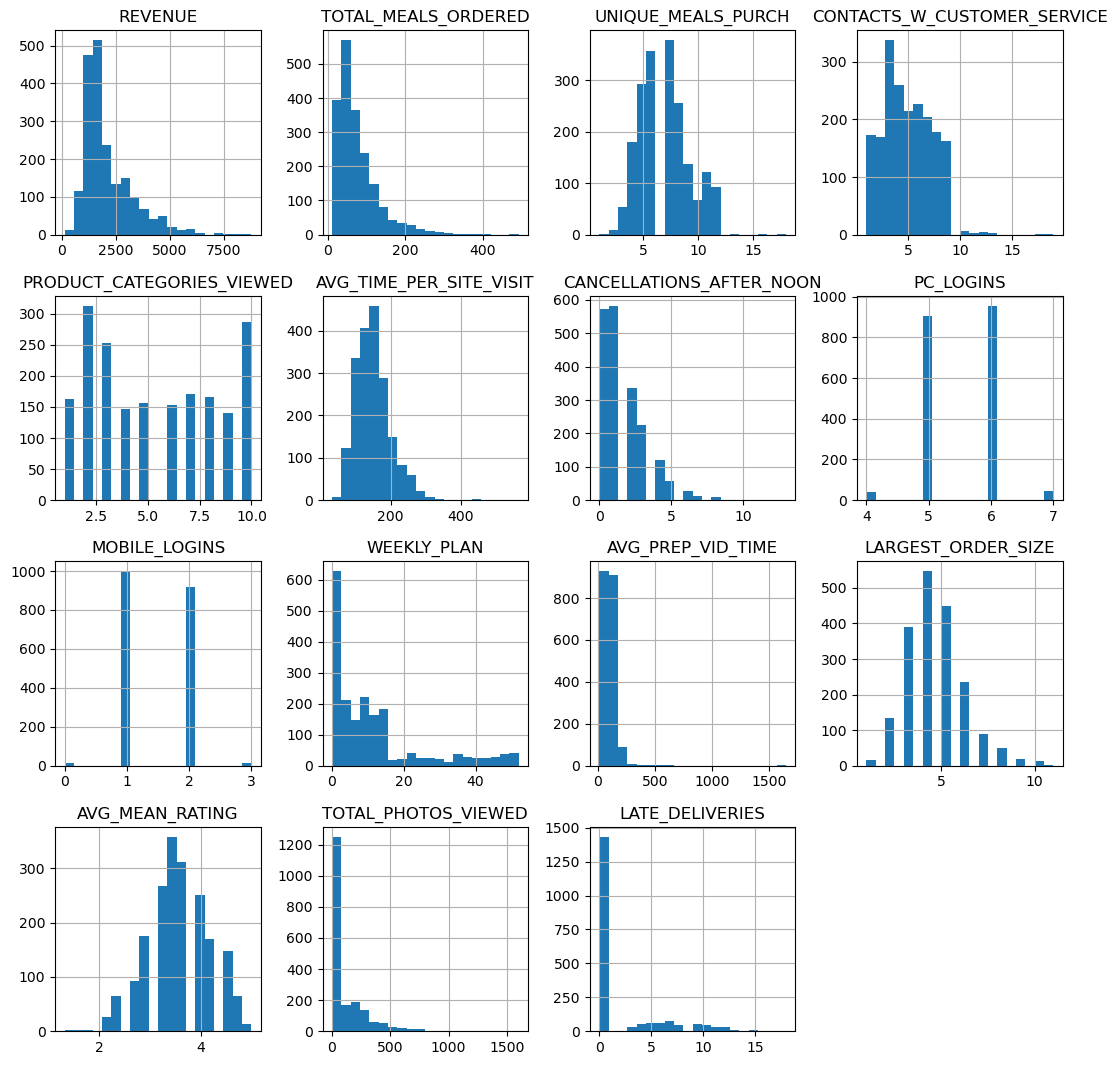

In [8]:
# Check all numeric columns' distribute status with basic histogram Chart
df._get_numeric_data().hist(bins=20, figsize=(13, 13))
plt.show()

***
## Feature Engineering
### Logarithm TOTAL_MEALS_ORDERED
 - Convert TOTAL_MEALS_ORDERED to logarithm scale makes a more linear relationship in log scaled Revenue. 
 - LN_TOTAL_MEALS_ORDERED has a 0.694 correlation coefficient on LN_REVENUE.
 - In the case of calculating this variable, this study recognizes some weird distribution between revenue and total meals ordered. 

In [9]:
# Checking Linearity between x-features and y variable.
# Compare with original and logarithm Revenue
df['LN_REVENUE'] = np.log(df['REVENUE'])

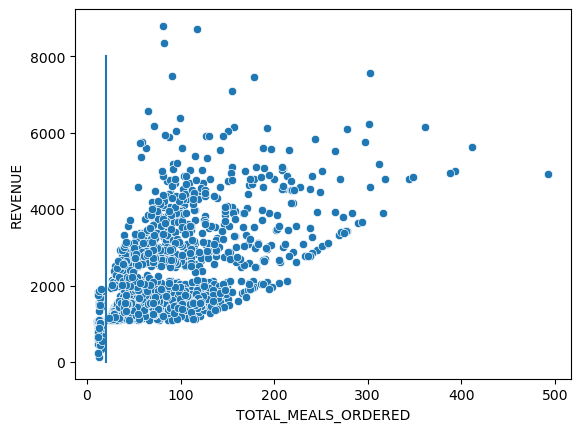

In [10]:
# Check REVENU vs. TOTAL_MEALS_ORDERED
sns.scatterplot(y='REVENUE', x='TOTAL_MEALS_ORDERED', data=df)
# REVENUE's distribution is divided by over e^3 of TOTAL_MEALS_ORDERED or under
plt.plot([np.e ** 3, np.e**3], [0, 8000])
plt.show()

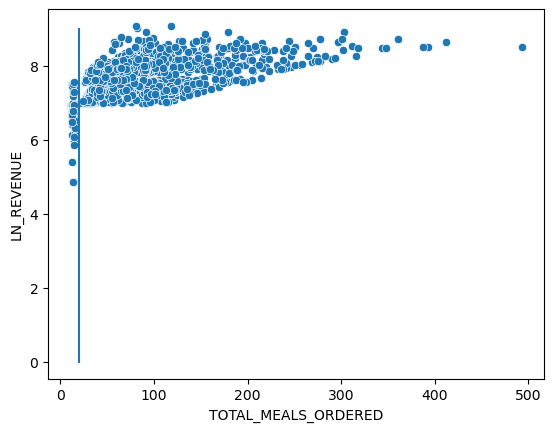

In [11]:
# Check LN_REVENUE vs. TOTAL_MELAS ORDERED
sns.scatterplot(y='LN_REVENUE', x='TOTAL_MEALS_ORDERED', data=df)
# LN_REVENUE's distribution is divided by over e^3 of TOTAL_MEALS_ORDERED or under
plt.plot([np.e ** 3, np.e**3], [0, 9])
plt.show()

In [12]:
# Check for logarithm total_meals_ordered
df['LN_TOTAL_MEALS_ORDERED'] = np.log(df['TOTAL_MEALS_ORDERED'])

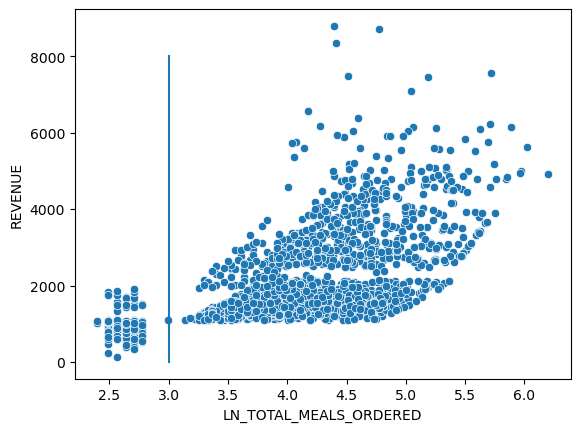

In [13]:
# Check REVENUE vs. LN_TOTAL_MEALS_ORDERED
sns.scatterplot(y='REVENUE', x='LN_TOTAL_MEALS_ORDERED', data=df)
# REVENUE's distribution is divided by over 3 of LN_TOTAL_MEALS_ORDERED or under
plt.plot([3,3], [0,8000])
plt.show()

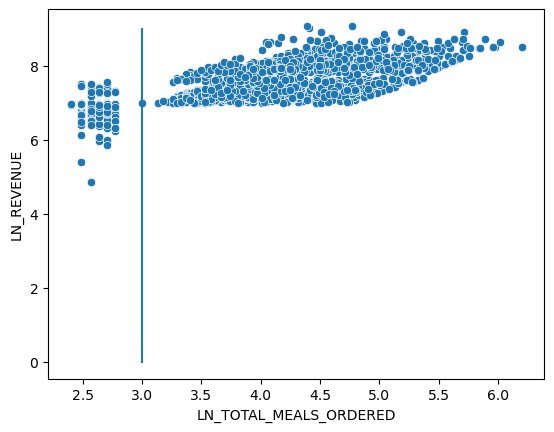

In [14]:
# Check LN_REVENU vs. LN_TOTAL_MEALS_ORDERED
sns.scatterplot(y='LN_REVENUE', x='LN_TOTAL_MEALS_ORDERED', data=df)
# LN_REVENUE's distribution is divided by over 3 of LN_TOTAL_MEALS_ORDERED or under
plt.plot([3,3], [0,9])
plt.show()

**Correlation with Engineered Features**
 - LN_TOTAL_MEALS_ORDERD has the most correlation coefficient with Log scaled revenue, by 0.694.

In [15]:
# Check Correlation of REVENUE, LN_REVENUE, TOTAL_MEALS_ORDERED, and LN_TOTAL_MEALS_ORDERED
df[['REVENUE', 'LN_REVENUE', 'TOTAL_MEALS_ORDERED', 'LN_TOTAL_MEALS_ORDERED']].corr(method='pearson')[['REVENUE', 'LN_REVENUE']].round(decimals=3)

,REVENUE,LN_REVENUE
REVENUE,1.000,0.947
LN_REVENUE,0.947,1.000
TOTAL_MEALS_ORDERED,0.600,0.609
LN_TOTAL_MEALS_ORDERED,0.610,0.694


In [16]:
# Weired distribution it compeletely divide by LN_TOTAL_MEALS_OREDERED > 3 or not
# Checking the data
df[df['LN_TOTAL_MEALS_ORDERED'] < 3].describe()

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,LATE_DELIVERIES,LN_REVENUE,LN_TOTAL_MEALS_ORDERED
count,215.000000,215.000000,215.000000,215.000000,215.00000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,948.713953,13.883721,11.460465,4.655814,4.95814,107.478140,1.637209,5.516279,1.367442,10.744186,85.368140,3.446512,4.104039,41.609302,2.093023,6.807486,2.626678
std,285.466968,1.256930,0.593634,2.519578,2.82729,35.384491,1.707190,0.578804,0.538135,13.052899,53.419783,1.566493,0.498462,105.760556,3.867030,0.325919,0.089977
min,131.000000,11.000000,11.000000,1.000000,1.00000,33.400000,0.000000,4.000000,0.000000,0.000000,10.330000,1.000000,2.894737,3.000000,0.000000,4.875197,2.397895
25%,800.000000,13.000000,11.000000,3.000000,3.00000,84.550000,0.000000,5.000000,1.000000,1.000000,57.120000,2.000000,3.684211,7.000000,0.000000,6.684612,2.564949
50%,950.000000,14.000000,11.000000,4.000000,4.00000,98.800000,1.000000,6.000000,1.000000,6.000000,80.270000,3.000000,4.210526,12.000000,0.000000,6.856462,2.639057
75%,1050.000000,15.000000,12.000000,6.000000,7.00000,124.350000,2.000000,6.000000,2.000000,13.000000,99.400000,4.000000,4.473684,17.500000,3.500000,6.956545,2.708050
max,1905.750000,20.000000,16.000000,9.000000,10.00000,237.200000,8.000000,7.000000,2.000000,52.000000,567.000000,10.000000,5.000000,771.000000,17.000000,7.552631,2.995732


### Sub group dummy variable of total meals ordered
 - It represents less and equal to 3 in log scale total meals ordered as 1, other as 0.
 - Subgroup has an 11% proportion of all observations. It has 948.71 in Revenue, and 11.46 in Unique meals purchased.
 - Exclude Revenue, total meals ordered, and unique meals purchased, other features do not have any relationship with subgroup. 

In [17]:
# Divide subset dummy Values
df['subGroupOfTotalMeals'] = 0

# Loop for new variable
for index, row in df.iterrows():
    # Condition statement. if log scale total meals ordered less and equal to 3.
    if row['LN_TOTAL_MEALS_ORDERED'] <= 3:
        # subGroupOfTotalMeals set 1. 
        df.loc[index, 'subGroupOfTotalMeals'] = 1

In [18]:
# Sub group has 11% proportion of all observation.
df[ ['subGroupOfTotalMeals']].mean().round(3)

subGroupOfTotalMeals    0.11
dtype: float64

In [19]:
# Compare descriptive statistics between sub group 0 and 1. 
df.groupby('subGroupOfTotalMeals').describe()

REVENUE                                                                     TOTAL_MEALS_ORDERED                                                       UNIQUE_MEALS_PURCH                                                    CONTACTS_W_CUSTOMER_SERVICE                                               PRODUCT_CATEGORIES_VIEWED                                               AVG_TIME_PER_SITE_VISIT                                                            CANCELLATIONS_AFTER_NOON                                               PC_LOGINS                                              MOBILE_LOGINS                                              WEEKLY_PLAN                                                  AVG_PREP_VID_TIME                                                             LARGEST_ORDER_SIZE                                               AVG_MEAN_RATING                                                                  TOTAL_PHOTOS_VIEWED                                     \
                       count         mean          std     min     25%     50%      75%      max               count       mean        std   min   25%   50%    75%    max              count       mean       std   min   25%   50%   75%   max                       count      mean       std  min  25%  50%  75%   max                     count      mean       std  min  25%  50%  75%   max                   count        mean        std   min     25%    50%     75%    max                    count      mean       std  min  25%  50%  75%   max     count      mean       std  min  25%  50%  75%  max         count      mean       std  min  25%  50%  75%  max       count       mean        std  min  25%  50%   75%   max             count        mean        std    min    25%    50%     75%     max              count      mean       std  min  25%  50%  75%   max           count      mean       std       min       25%       50%       75%  max               count        mean         std  min   25%   
subGroupOfTotalMeals                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
0                     1731.0  2251.194685  1122.102645  1095.0  1448.5  1830.0  2778.75  8793.75              1731.0  82.179665  54.069721  23.0  45.0  65.0  101.0  493.0             1731.0   6.427499  1.733994   1.0   5.0   6.0   8.0  18.0                      1731.0  4.935875  2.499004  1.0  3.0  5.0  7.0  19.0                    1731.0  5.436742  3.066491  1.0  3.0  5.0  8.0  10.0                  1731.0  155.907163  48.319065  67.2  121.80  150.1  178.60  564.2                   1731.0  1.562681  1.599124  0.0  0.0  1.0  2.0  13.0    1731.0  5.515887  0.581165  4.0  5.0  6.0  6.0  7.0        1731.0  1.489890  0.524858  0.0  1.0  1.0  2.0  3.0      1731.0  11.402657  13.638443  0.0  1.0  7.0  13.5  52.0            1731.0  101.372906  63.152067  12.00  75.00  95.91  119.15  1645.6             1731.0  4.560370  1.503068  1.0  4.0  4.0  5.0  11.0          1731.0  3.486576  0.592631  1.315789  3.157895  3.421053  3.947368  5.0              1731.0  122.037551  182.165894  1.0  11.0   
1                      215.0 

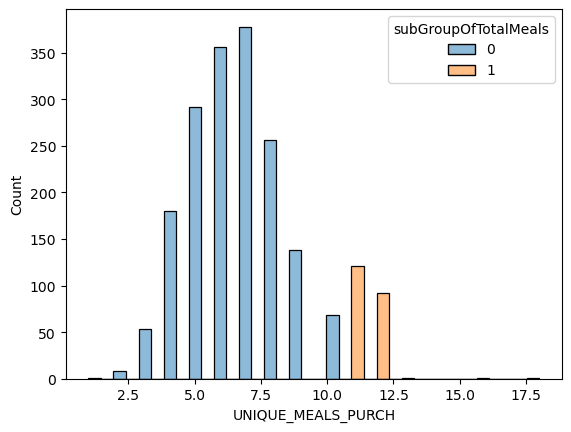

In [20]:
# Check UNIQUE_MEALS_PURCH's histogram with sub group
sns.histplot(x='UNIQUE_MEALS_PURCH', hue='subGroupOfTotalMeals', data=df)
plt.show()

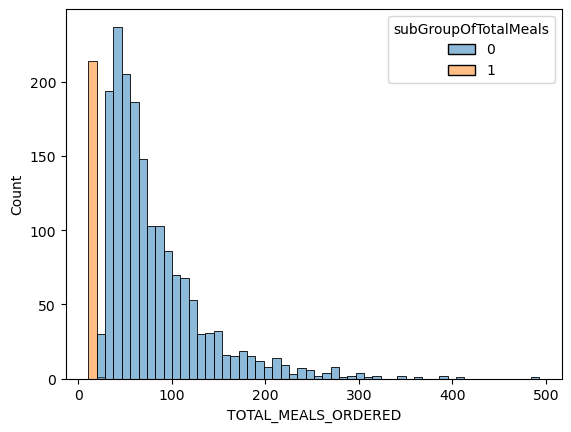

In [21]:
# Check TOTAL_MEALS_ORDERED histogram with sub group.
sns.histplot(x='TOTAL_MEALS_ORDERED', hue='subGroupOfTotalMeals', data=df)
plt.show()

### Adjusted unique meals purchased
 - After checking the subgroup with the unique meals purchased variable, this study found that UNIQUE_MEALS_PURCH and LN_TOTAL_MEALS_ORDERED have divided distribution. 
 - In particular, look at the scatter plot of LN_TOTAL_MEALS_ORDERED vs. UNIQUE_MEALS_PURCH, we can recognize whether those distributions were divided by greater than 10 or not in UNIQUE_MEALS_PURCH. In addition, All of over 10 UNIQUE_MEALS_PURCH have less than 3 in LN_TOTAL_MEALS_ORDERED except one observation. 
 - From all those things, this study defined new unique meals purchased as putting greater than 10 observations into 10, and defined it as UNIQUE_MEALS_PURCH_EDT.

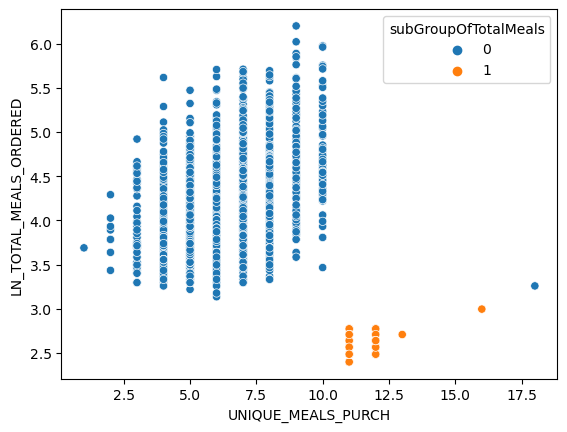

In [22]:
# Check distribution of LN_TOTAL_MEALS_ORDERED vs. UNIQUE_MEALS_PURCH with Sub Group
sns.scatterplot(x='UNIQUE_MEALS_PURCH', y='LN_TOTAL_MEALS_ORDERED', hue='subGroupOfTotalMeals', data=df)
plt.show()

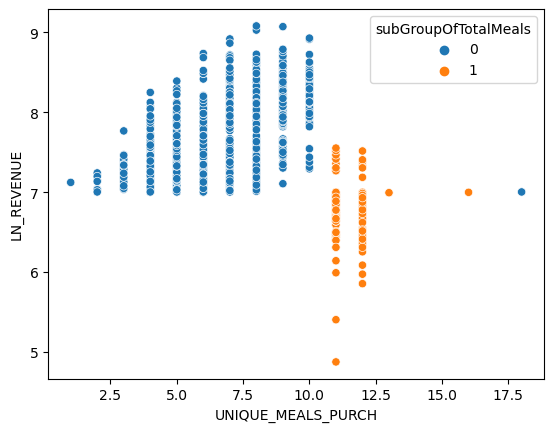

In [23]:
# Check distribution of LN_REVENUE vs. UNIQUE_MEALS_PURCH with Sub Group
sns.scatterplot(x='UNIQUE_MEALS_PURCH', y='LN_REVENUE', hue='subGroupOfTotalMeals', data=df)
plt.show()

In [24]:
# Make new variable for UNIQUE_MEALS_PURCH_EDT
df['UNIQUE_MEALS_PURCH_EDT'] = 0

# Looping for values
for index, row in df.iterrows():
    # Defined UNIQUE_MEALS_PURCH = 10 means including OVER 10 values
    if row['UNIQUE_MEALS_PURCH'] > 10: 
        df.loc[index, 'UNIQUE_MEALS_PURCH_EDT'] = 10
    # Under 10 UNIQUE_MEALS_PURCH are use as itself.
    else:
        df.loc[index, 'UNIQUE_MEALS_PURCH_EDT'] = row['UNIQUE_MEALS_PURCH']


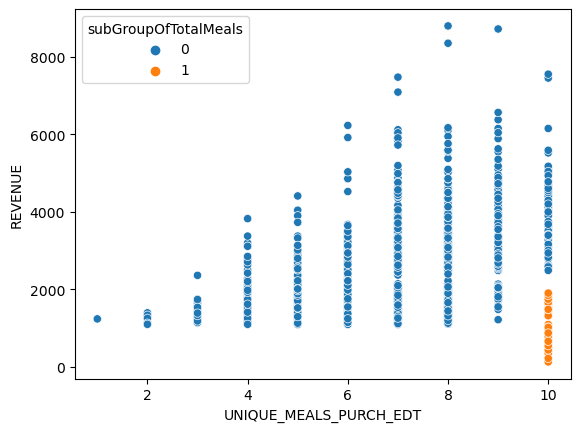

In [25]:
# Check for new feature. REVENUE vs. UNIQUE_MEALS_PURCH
sns.scatterplot(x='UNIQUE_MEALS_PURCH_EDT', y='REVENUE', hue='subGroupOfTotalMeals', data=df)
plt.show()

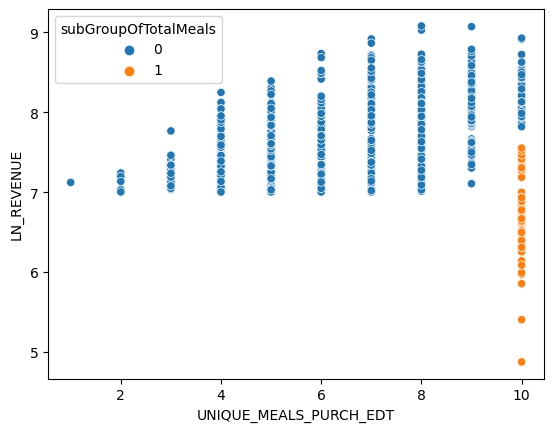

In [26]:
# Check LN_REVENU vs. UNIQUE_MEALS_PURCH_EDT
sns.scatterplot(x='UNIQUE_MEALS_PURCH_EDT', y='LN_REVENUE', hue='subGroupOfTotalMeals', data=df)
plt.show()

**Correlation with Engineered Features**
 - LN_TOTAL_MEALS_ORDERD has the most correlation coefficient with Log scaled revenue, by 0.694.
 - Sub Group Dummy variable has a negative (-0.522) correlation with Log scaled revenue.
 - UNIQUE_MEALS_PURCH_EDT has slightly more correlation in absolute number (0.081) rather than before. (-0.037)

In [27]:
# Check Correlation between revenue and original or engineered features.
df[['REVENUE', 'LN_REVENUE', 'TOTAL_MEALS_ORDERED', 'LN_TOTAL_MEALS_ORDERED', 'subGroupOfTotalMeals', 'UNIQUE_MEALS_PURCH', 'UNIQUE_MEALS_PURCH_EDT']].corr(method='pearson').round(decimals=3).iloc[:, [0,1]]

,REVENUE,LN_REVENUE
REVENUE,1.000,0.947
LN_REVENUE,0.947,1.000
TOTAL_MEALS_ORDERED,0.600,0.609
LN_TOTAL_MEALS_ORDERED,0.610,0.694
subGroupOfTotalMeals,-0.359,-0.522
UNIQUE_MEALS_PURCH,0.102,-0.037
UNIQUE_MEALS_PURCH_EDT,0.204,0.081


### Adjusted average meal rating
 - AVG_MEAN_RATING, which means average meal rating by the customer, has only 15 values in total observation. 
 - Actually, AVG_MEAN_RATING is a continuous variable, but, in this case, this study decided this variable as an interval variable. 
 - To handle this situation, this study focuses on the counts of each value in AVG_MEAN_RATING.
 - There are only 31 observations in AVG_MEAN_RATING, which is less than 2.37, and only 78 observations has greater than 4.47.
 - Thus, this study engineered this feature to combine fewer records of both sides. 
 - Finally, in AVG_MEAN_RATING_EDT has 10 recorded values and 2.37 means 2.37 and less than, 4.47 means 4.47 and greater than.

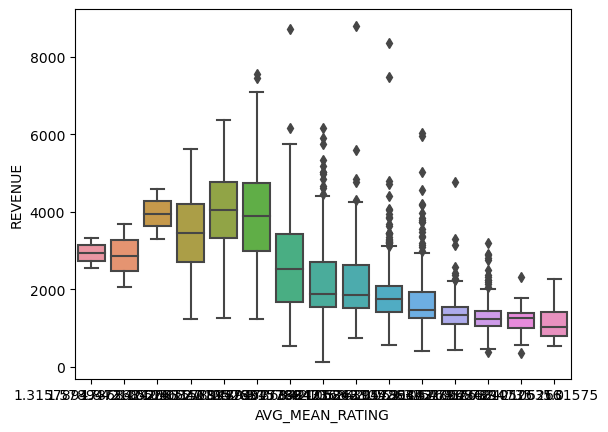

In [28]:
# Check boxplot with REVENUE vs. AVG_MEAN_RATING
sns.boxplot(y='REVENUE', x='AVG_MEAN_RATING', data=df)
plt.show()

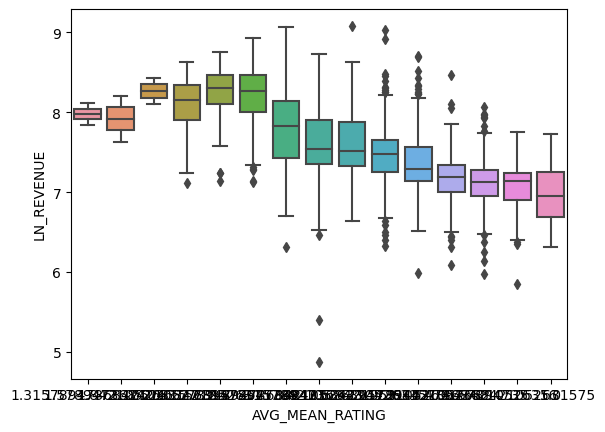

In [29]:
# Check boxplot with LN_REVENUE vs. AVG_MEAN_RATING
sns.boxplot(y='LN_REVENUE', x='AVG_MEAN_RATING', data=df)
plt.show()

In [30]:
# Displaying all recorded values of AVG_MEAN_RATING
df[['AVG_MEAN_RATING']].round(decimals=2).value_counts().sort_index()

AVG_MEAN_RATING
1.32                 2
1.58                 2
1.84                 2
2.11                27
2.37                64
2.63                92
2.89               175
3.16               267
3.42               358
3.68               312
3.95               250
4.21               169
4.47               148
4.74                64
5.00                14
dtype: int64

In [31]:
# Declare new feature of AVG_MEAN_RATING_EDT
df['AVG_MEAN_RATING_EDT'] = 0
for index, row in df.iterrows():
    # Less than 2.37 combined with 2.37. These has 33 observations only.
    if round(row['AVG_MEAN_RATING'], 2) < 2.37:
        df.loc[index, 'AVG_MEAN_RATING_EDT'] = 2.37 # Less than 2.37 grouped with 2.37 value
    # Greater than 4.74 combined with 4.74. These has 78 obervations only.
    elif round(row['AVG_MEAN_RATING'], 2) > 4.74:
        df.loc[index, 'AVG_MEAN_RATING_EDT'] = 4.74
    # Other values use as itself.
    else:
        df.loc[index, 'AVG_MEAN_RATING_EDT'] = round(row['AVG_MEAN_RATING'], 2)
# Checking all recoreded values of AVG_MEAN_RATING_EDT
df[['AVG_MEAN_RATING_EDT']].round(decimals=2).value_counts().sort_index()

AVG_MEAN_RATING_EDT
2.37                    97
2.63                    92
2.89                   175
3.16                   267
3.42                   358
3.68                   312
3.95                   250
4.21                   169
4.47                   148
4.74                    78
dtype: int64

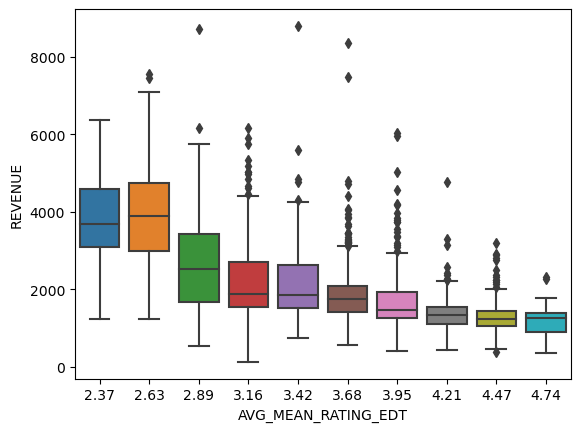

In [32]:
# Check boxplot REVENUE vs. AVG_MEAN_RATING_EDT
sns.boxplot(y='REVENUE', x='AVG_MEAN_RATING_EDT', data=df)
plt.show()

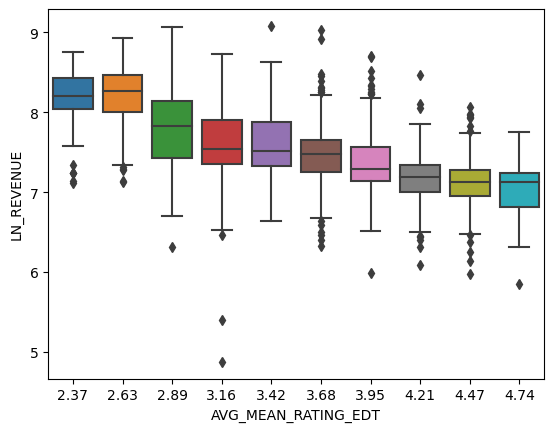

In [33]:
# Check boxplot LN_REVENU vs. AVG_MEAN_RATING_EDT
sns.boxplot(y='LN_REVENUE', x='AVG_MEAN_RATING_EDT', data=df)
plt.show()

**Correlation with Engineered Features**

 - AVG_MEAN_RAGING_EDT has the most correlation coefficient with Log scaled revenue, by -0.581.
 - This result means that we have more adjusted correlation coefficient, but not in much.

In [34]:
# Check Correlation between revenue and original or engineered features.
df[['REVENUE', 'LN_REVENUE', 'AVG_MEAN_RATING', 'AVG_MEAN_RATING_EDT']].corr(method='pearson')[['REVENUE', 'LN_REVENUE']].round(3)

,REVENUE,LN_REVENUE
REVENUE,1.000,0.947
LN_REVENUE,0.947,1.000
AVG_MEAN_RATING,-0.554,-0.578
AVG_MEAN_RATING_EDT,-0.558,-0.581


### Adjusted contacts web customer service
 - CONTACTS_W_CUSTOMER_SERVICE has 15 recorded values. And the values, that are greater and equal to 10, have overall a few observations under 10. 
 - So, this study decided that combine all records that have greater than 9 as CONTACTS_W_CUSOMER_SERVICE_EDT
 - Consequently, CONTATCS_W_CUSTOMER_SERIVCE_EDT 9 means 9 and greater than 9. 

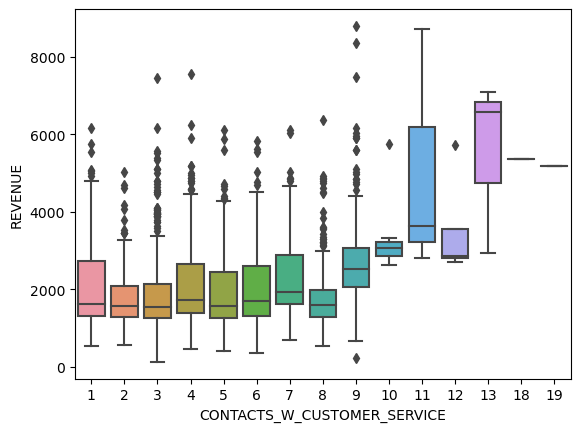

In [35]:
# Check boxplot with REVENUE vs. CONTACTS_W_CUSTOMER_SERVICE
sns.boxplot(y='REVENUE', x='CONTACTS_W_CUSTOMER_SERVICE', data=df)
plt.show()

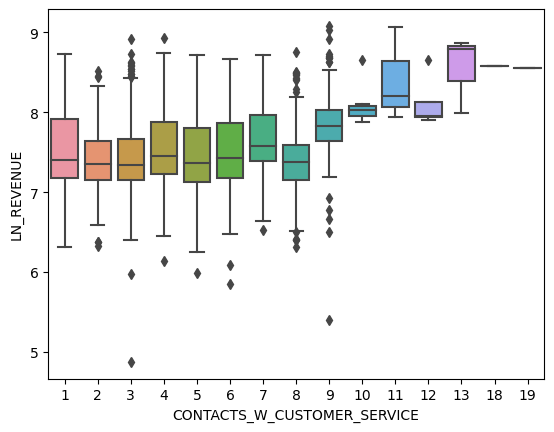

In [36]:
# Check boxplot with LN_REVENUE vs. CONTATCS_W_CUSTOMER_SERVICE
sns.boxplot(y='LN_REVENUE', x='CONTACTS_W_CUSTOMER_SERVICE', data=df)
plt.show()

In [37]:
# Displaying all recorded values of CONTACT_W_CUSTOMER_SERVICE
df['CONTACTS_W_CUSTOMER_SERVICE'].value_counts().sort_index()

1     173
2     170
3     338
4     260
5     214
6     226
7     205
8     179
9     162
10      7
11      3
12      4
13      3
18      1
19      1
Name: CONTACTS_W_CUSTOMER_SERVICE, dtype: int64

In [38]:
# Declare new feature CONTATCS_W_CUSTOMER_SERVICE_EDT
df['CONTACTS_W_CUSTOMER_SERVICE_EDT'] = 0

# Loop for check values
for index, row in df.iterrows():
    # If feature has greater and equal to 10, put it into 9.
    if row['CONTACTS_W_CUSTOMER_SERVICE'] >= 10:
        df.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE_EDT'] = 9
    # Others use as itself.
    else:
        df.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE_EDT'] = row['CONTACTS_W_CUSTOMER_SERVICE']

# Check all recoreded vbalues of new Feature
df['CONTACTS_W_CUSTOMER_SERVICE_EDT'].value_counts().sort_index()

1    173
2    170
3    338
4    260
5    214
6    226
7    205
8    179
9    181
Name: CONTACTS_W_CUSTOMER_SERVICE_EDT, dtype: int64

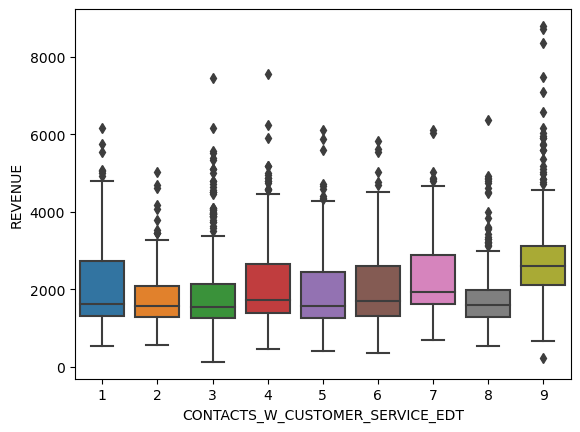

In [39]:
# Check boxplot with new feature
sns.boxplot(y='REVENUE', x='CONTACTS_W_CUSTOMER_SERVICE_EDT', data=df)
plt.show()

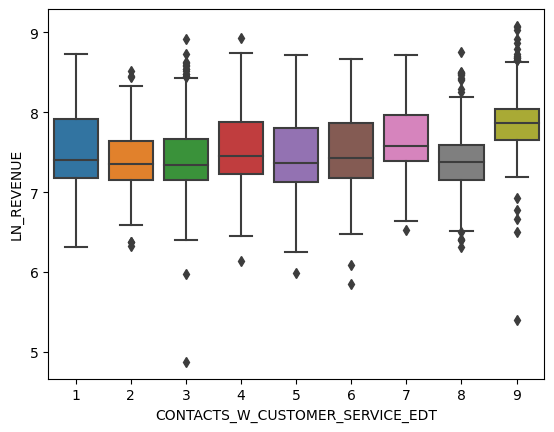

In [40]:
# Check boxplot with LN_REVNUE vs. new Feature
sns.boxplot(y='LN_REVENUE', x='CONTACTS_W_CUSTOMER_SERVICE_EDT', data=df)
plt.show()

**Correlation with Engineered Features**

 - CONTACTS_W_CUSTOMER_SERVICCE_EDT has less correlation coefficient than the original feature with Log scaled revenue, by 0.164.
 - This result means that we lose the correlation coefficient, but not by much.

In [41]:
# Check Correlation between revenue and original or engineered features.
df[['REVENUE', 'LN_REVENUE', 'CONTACTS_W_CUSTOMER_SERVICE', 'CONTACTS_W_CUSTOMER_SERVICE_EDT']].corr(method='pearson')[['REVENUE', 'LN_REVENUE']].round(3)

,REVENUE,LN_REVENUE
REVENUE,1.000,0.947
LN_REVENUE,0.947,1.000
CONTACTS_W_CUSTOMER_SERVICE,0.174,0.179
CONTACTS_W_CUSTOMER_SERVICE_EDT,0.153,0.164


### Adjusted product categories viewed
 - According to the boxplot with REVENUE, this variable has a pattern, that shows it has slightly more average revenue when it is 1, 2, 5, 6, 9, and 10. 
 - From this perspective, this study engineered this feature as aggregating those groups. 
 - So PRODUCT_CATEGORIES_VIEWED_EDT represents that 1.5 means 1 and 2. In hence, recalculated in the mean of each group's value. 

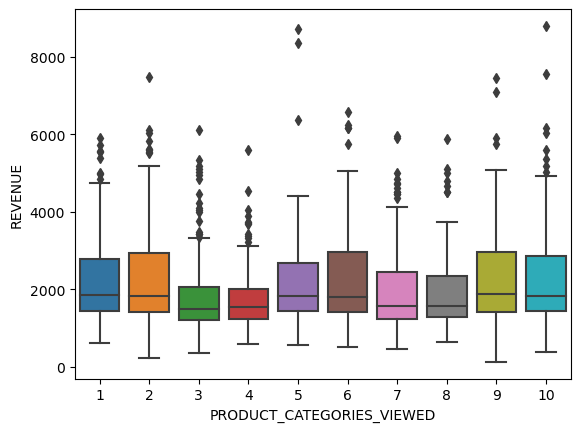

In [42]:
# check boxplot with REVENUE vs. PRODUCT_CATEOGIES_VIEWED
sns.boxplot(y='REVENUE', x='PRODUCT_CATEGORIES_VIEWED', data=df)
plt.show()

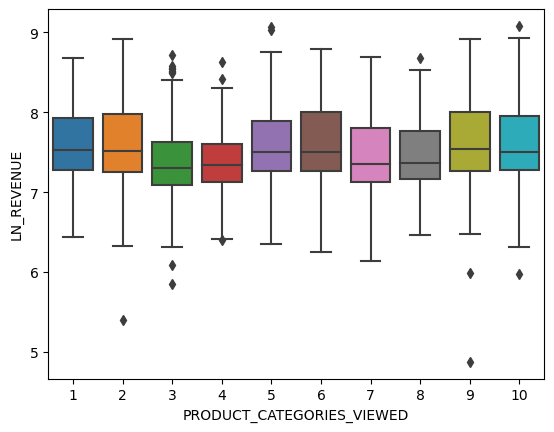

In [43]:
# Check boxplot with LN_REVENUE vs. PRODUCT_CATEGORIES_VIEWED
sns.boxplot(y='LN_REVENUE', x='PRODUCT_CATEGORIES_VIEWED', data=df)
plt.show()

In [44]:
# Defined PRODUCT_CATEGORIES_VIEWED_EDT
df['PRODUCT_CATEGORIES_VIEWED_EDT'] = 0

# Make loop for caclulation.
for index, row in df.iterrows():
    
    # VALUE 1, 2 has 1.5 as periodic mean.
    if row['PRODUCT_CATEGORIES_VIEWED'] in [1, 2]:
        df.loc[index, 'PRODUCT_CATEGORIES_VIEWED_EDT'] = 1.5
    # Value 3, 4 has 3.5 as periodic mean
    elif row['PRODUCT_CATEGORIES_VIEWED'] in [3, 4]:
        df.loc[index, 'PRODUCT_CATEGORIES_VIEWED_EDT'] = 3.5
    # Value 5, 6 has 5.5 as periodic mean
    elif row['PRODUCT_CATEGORIES_VIEWED'] in [5, 6]:
        df.loc[index, 'PRODUCT_CATEGORIES_VIEWED_EDT'] = 5.5
    # Value 7, 8 has 7.5 as periodic mean
    elif row['PRODUCT_CATEGORIES_VIEWED'] in [7, 8]:
        df.loc[index, 'PRODUCT_CATEGORIES_VIEWED_EDT'] = 7.5
    # Value 9, 10 has 9.5 as periodic mean
    elif row['PRODUCT_CATEGORIES_VIEWED'] in [9, 10]:
        df.loc[index, 'PRODUCT_CATEGORIES_VIEWED_EDT'] = 9.5

# Check the mean revenue of aggregated group. 
print(df[df['PRODUCT_CATEGORIES_VIEWED'] < 3][['REVENUE']].mean().round(decimals=3))
df.groupby('PRODUCT_CATEGORIES_VIEWED_EDT')[['REVENUE']].mean().round(decimals=3)

REVENUE    2246.209
dtype: float64


,REVENUE
PRODUCT_CATEGORIES_VIEWED_EDT,
1.5,2246.209
3.5,1782.165
5.5,2235.416
7.5,1950.577
9.5,2287.168


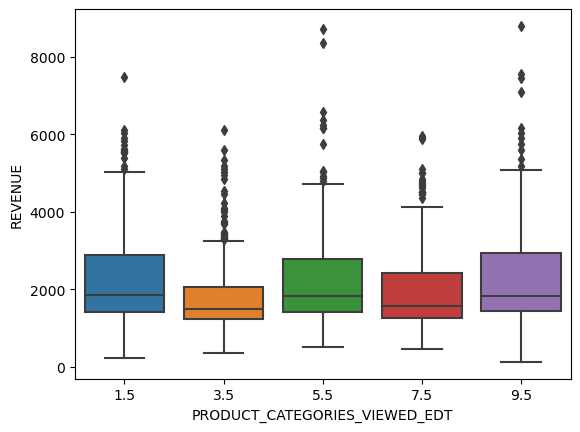

In [45]:
# Check boxplot REVENUE Vs. new feature
sns.boxplot(y='REVENUE', x='PRODUCT_CATEGORIES_VIEWED_EDT', data=df)
plt.show()

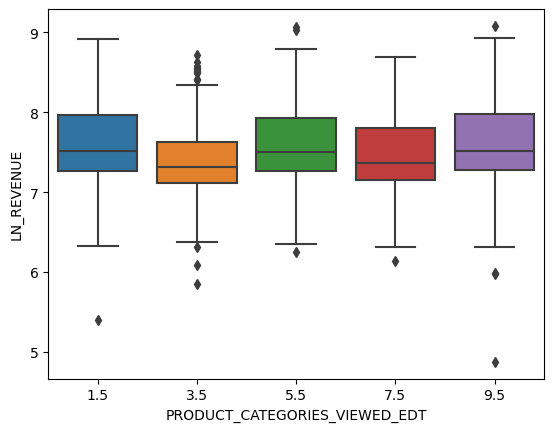

In [46]:
# Check boxplot LN_REVENUE Vs. new feature
sns.boxplot(y='LN_REVENUE', x='PRODUCT_CATEGORIES_VIEWED_EDT', data=df)
plt.show()

**Correlation with Engineered Features**

 - PRODUCT_CATEGORIES_VIEWED_EDT has less correlation coefficient than the original feature with Log scaled revenue, by 0.03.
 - This result means that we lose the correlation coefficient, but not by much.

In [47]:
# Check Correlation between revenue and original or engineered features.
df[['REVENUE', 'LN_REVENUE', 'PRODUCT_CATEGORIES_VIEWED', 'PRODUCT_CATEGORIES_VIEWED_EDT']].corr(method='pearson')[['REVENUE', 'LN_REVENUE']].round(decimals=3)

,REVENUE,LN_REVENUE
REVENUE,1.000,0.947
LN_REVENUE,0.947,1.000
PRODUCT_CATEGORIES_VIEWED,0.034,0.037
PRODUCT_CATEGORIES_VIEWED_EDT,0.030,0.031


### Building Dummy variable with Product categories viewed
 - To determine each period of product categories viewed feature's effect, this study builds dummy variables based on PRODUCT_CATEGORIES_VIEWED_EDT.
 - Firstly, build a new categorical variable named PROD_CTGR_VW_EDT_GRP, using PRODUCT_CATEGORIES_VIEWED_EDT. 
 - Get dummy variables from PROD_CTGR_VW_EDT_GRP.
 - CTGR_GRP_1_5 means that 1 represent PRODUCT_CATETORIES_VIEWED_EDT equal to 1.5.
 - CTGR_GRP_3_5 means that 1 represent PRODUCT_CATETORIES_VIEWED_EDT equal to 3.5.
 - CTGR_GRP_5_5 means that 1 represent PRODUCT_CATETORIES_VIEWED_EDT equal to 5.5.
 - CTGR_GRP_7_5 means that 1 represent PRODUCT_CATETORIES_VIEWED_EDT equal to 7.5.
 - CTGR_GRP_9_5 means that 1 represent PRODUCT_CATETORIES_VIEWED_EDT equal to 9.5.

In [48]:
# Loop for values evaluating
for index, row in df.iterrows():
    # Build a CATEGORICAL feature of product categories viewed edt, after converting numeric value to string values
    df.loc[index, 'PROD_CTGR_VW_EDT_GRP'] = 'CTGR_GRP_' + str(row['PRODUCT_CATEGORIES_VIEWED_EDT']).replace('.', '_')

# Getting dummies.
prod_ctgr_grp = pd.get_dummies(df['PROD_CTGR_VW_EDT_GRP'])

# Check for rerun code. 
if 'CTGR_GRP_1_5' in df.columns.to_list():
    df = df.drop(['CTGR_GRP_1_5', 'CTGR_GRP_3_5', 'CTGR_GRP_5_5', 'CTGR_GRP_7_5', 'CTGR_GRP_9_5'], axis=1)

# Joining new dummy variables.
df = df.join(prod_ctgr_grp)

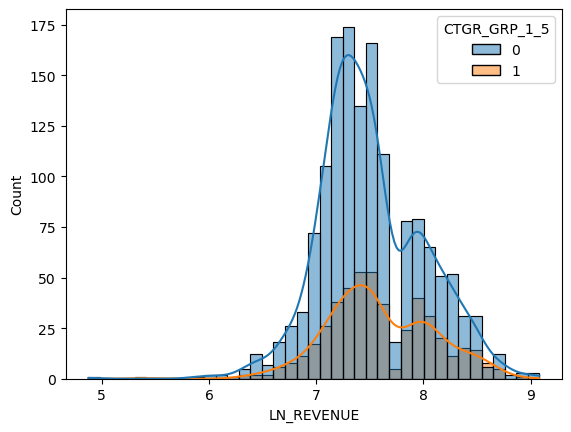

In [49]:
# Check LN_REVENUE's histogram with new dummy vairable
sns.histplot(x='LN_REVENUE', hue='CTGR_GRP_1_5', data=df, kde=True)
plt.show()

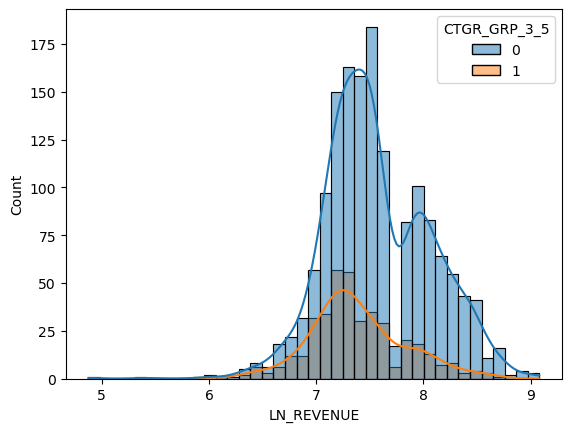

In [50]:
# Check LN_REVENUE's histogram with new dummy vairable
sns.histplot(x='LN_REVENUE', hue='CTGR_GRP_3_5', data=df, kde=True)
plt.show()

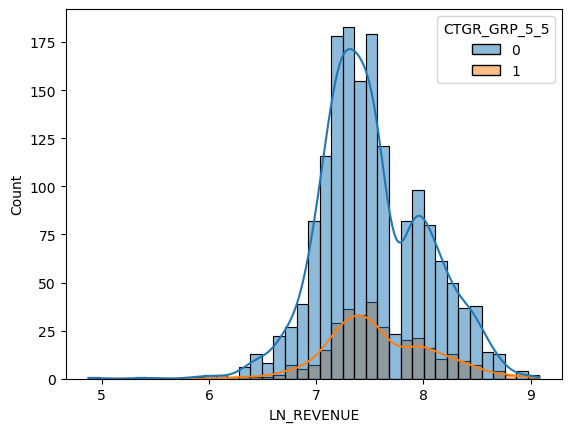

In [51]:
# Check LN_REVENUE's histogram with new dummy vairable
sns.histplot(x='LN_REVENUE', hue='CTGR_GRP_5_5', data=df, kde=True)
plt.show()

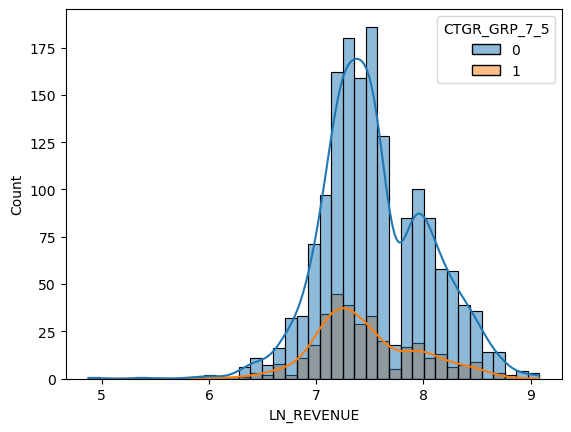

In [52]:
# Check LN_REVENUE's histogram with new dummy vairable
sns.histplot(x='LN_REVENUE', hue='CTGR_GRP_7_5', data=df, kde=True)
plt.show()

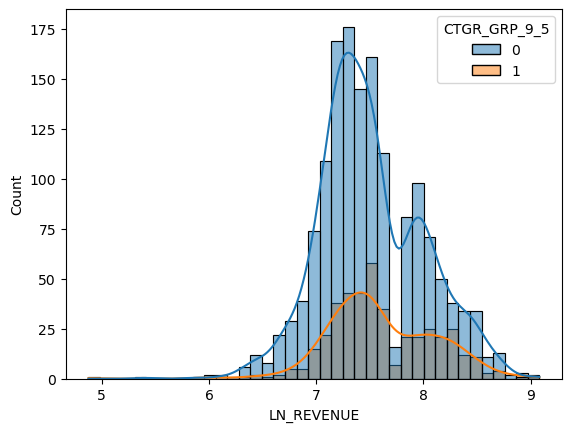

In [53]:
# Check LN_REVENUE's histogram with new dummy vairable
sns.histplot(x='LN_REVENUE', hue='CTGR_GRP_9_5', data=df, kde=True)
plt.show()

**Correlation with Engineered Features**

 - CTGR_GRP_3_5 has the most correlation coefficient in the negative direction by -0.156
 - Other dummy features have more correlation coefficients than before it is engineered.

In [54]:
# Check Correlation between revenue and original or engineered features.
df[['REVENUE', 'LN_REVENUE', 'PRODUCT_CATEGORIES_VIEWED', 'PRODUCT_CATEGORIES_VIEWED_EDT', 'CTGR_GRP_1_5', 'CTGR_GRP_3_5', 'CTGR_GRP_5_5', 'CTGR_GRP_7_5', 'CTGR_GRP_9_5']].corr(method='pearson').round(3).iloc[:, [0, 1]]

,REVENUE,LN_REVENUE
REVENUE,1.000,0.947
LN_REVENUE,0.947,1.000
PRODUCT_CATEGORIES_VIEWED,0.034,0.037
PRODUCT_CATEGORIES_VIEWED_EDT,0.030,0.031
CTGR_GRP_1_5,0.069,0.074
CTGR_GRP_3_5,-0.145,-0.156
CTGR_GRP_5_5,0.049,0.055
CTGR_GRP_7_5,-0.063,-0.065
CTGR_GRP_9_5,0.084,0.086


### Log scale average time per site visit
 - Continuous variable AVG_TIME_PER_SITE_VISIT, this study checked distribution with REVENUE, using a scatter chart.
 - At last, results seem that AVG_TIME_PER_SITE_VISIT has a more linear relation with REVENUE, but log-scaled AVG_TIME_PER_SITE_VISIT has a more linear relation with LN_REVENUE.

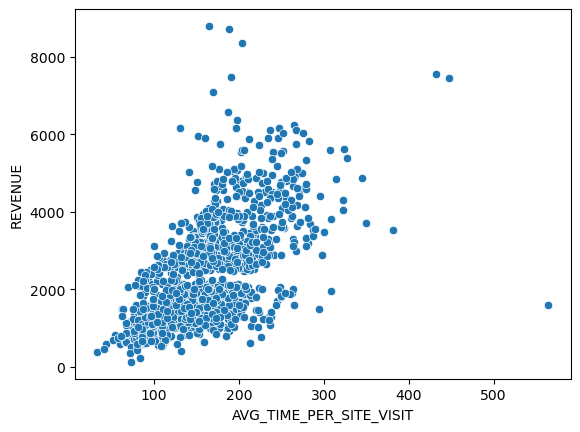

In [55]:
# Check distribution with REVENUE vs. AVG_TIME_PER_SITE_VISIT
sns.scatterplot(y='REVENUE', x='AVG_TIME_PER_SITE_VISIT', data=df)
plt.show()

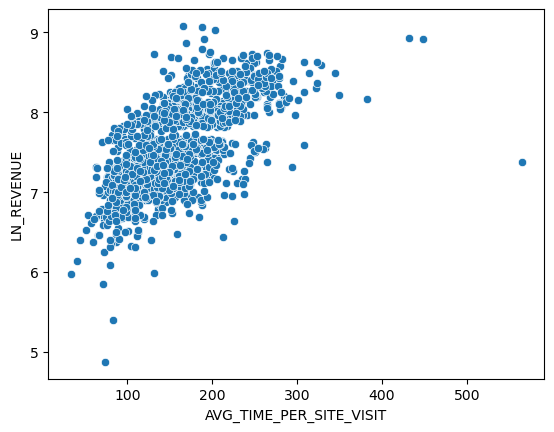

In [56]:
# Check distribution with LN_REVENUE vs. AVG_TIME_PER_SITE_VISIT
sns.scatterplot(y='LN_REVENUE', x='AVG_TIME_PER_SITE_VISIT', data=df)
plt.show()

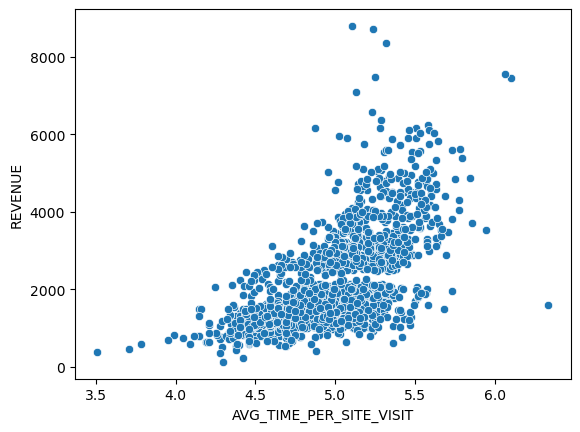

In [57]:
# Check distribution with REVENUE vs. log scale AVG_TIME_PER_SITE_VISIT
sns.scatterplot(y='REVENUE', x=np.log(df['AVG_TIME_PER_SITE_VISIT']), data=df)
plt.show()

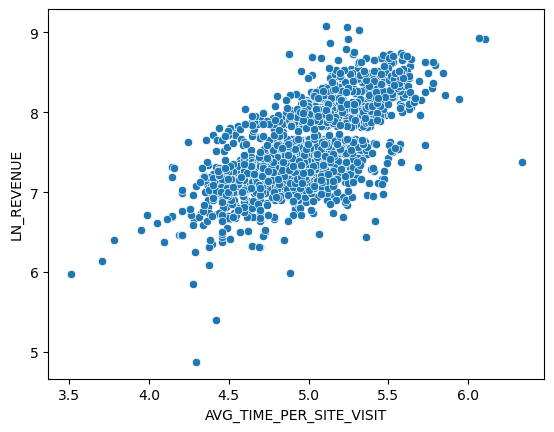

In [58]:
# Check distribution with REVENUE vs. log scale AVG_TIME_PER_SITE_VISIT
sns.scatterplot(y='LN_REVENUE', x=np.log(df['AVG_TIME_PER_SITE_VISIT']), data=df)
plt.show()

In [59]:
# Declare new column of Log scaled AVG_TIME_PER_SITE_VISIT as LN_AVG_TIME_PER_SITE_VISIT
df['LN_AVG_TIME_PER_SITE_VISIT'] = np.log(df['AVG_TIME_PER_SITE_VISIT'])

**Correlation with Engineered Features**

 - LN_AVG_TIME_PER_SITE_VISIT has the most correlation coefficient with LN_REVENUE by 0.670.
 - In the original REVENU, however, AVG_TIME_PER_SITE_VISIT has a 0.644 correlation coefficient, and it is more than the logarithm AVG_TIME_PER_SITE_VISIT.

In [60]:
# Check Correlation between revenue and original or engineered features.
df[['REVENUE', 'LN_REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'LN_AVG_TIME_PER_SITE_VISIT']].corr(method='pearson')[['REVENUE', 'LN_REVENUE']].round(decimals=3)

,REVENUE,LN_REVENUE
REVENUE,1.000,0.947
LN_REVENUE,0.947,1.000
AVG_TIME_PER_SITE_VISIT,0.644,0.651
LN_AVG_TIME_PER_SITE_VISIT,0.630,0.670


### Dummy variable for cancellations after noons.
 - This study made a dummy variable through CANCELLATIONS_AFTER_NOON has more than 0 as 1.

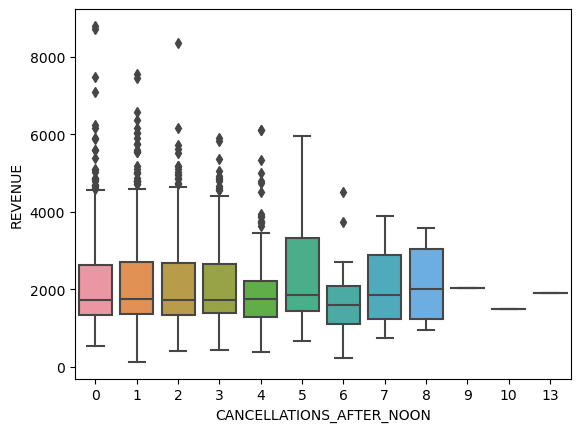

In [61]:
# Check boxplot REVENUE vs. CANCELLATIONS_AFTER_NOON
sns.boxplot(y='REVENUE', x='CANCELLATIONS_AFTER_NOON', data=df)
plt.show()

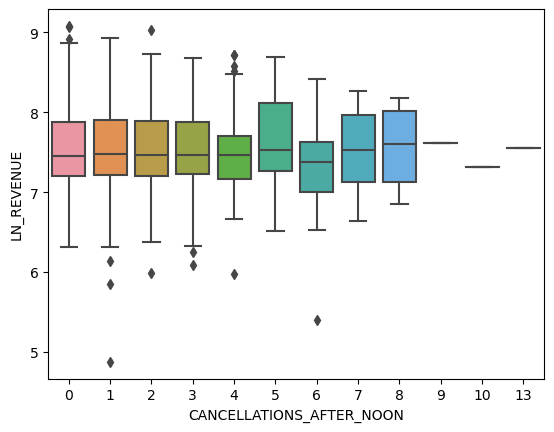

In [62]:
# Check boxplot LN_REVENUE vs. CANCELLATIONS_AFTER_NOON
sns.boxplot(y='LN_REVENUE', x='CANCELLATIONS_AFTER_NOON', data=df)
plt.show()

In [63]:
# Declare dummy variable. 
df['CANCELLATIONS_AFTER_NOON_YN'] = 0

# Loop for check variable
for index, row in df.iterrows():
    # checking for values it has more than 0.
    if row['CANCELLATIONS_AFTER_NOON'] > 0:
        df.loc[index, 'CANCELLATIONS_AFTER_NOON_YN'] = 1

**Correlation with Engineered Features**

 - The new dummy has more correlation coefficient than before 0.008.

In [64]:
# Check Correlation between revenue and original or engineered features.
df[['REVENUE', 'LN_REVENUE', 'CANCELLATIONS_AFTER_NOON', 'CANCELLATIONS_AFTER_NOON_YN']].corr(method='pearson')[['REVENUE', 'LN_REVENUE']].round(decimals=3)

,REVENUE,LN_REVENUE
REVENUE,1.000,0.947
LN_REVENUE,0.947,1.000
CANCELLATIONS_AFTER_NOON,0.003,-0.002
CANCELLATIONS_AFTER_NOON_YN,0.014,0.008


### Combine logins features
 - The dataset has two features that relate login counts by PC and Mobile. 
 - This study assume that PC_LOGINS and MOBILE_LOGINS make TOTAL_LOGINS.
 - But, PC_LOGINS and MOBILE_LOGINS do not have a stronger correlation. 

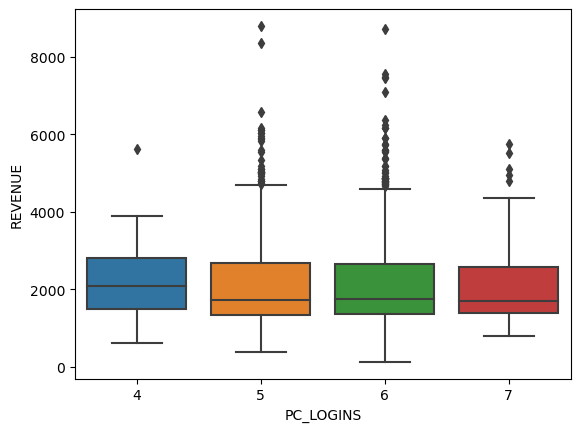

In [65]:
# Check boxplot REVENUE vs. PC_LOGINS
sns.boxplot(y='REVENUE', x='PC_LOGINS', data=df)
plt.show()

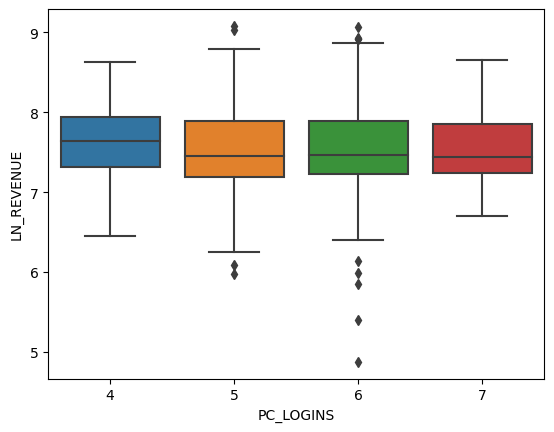

In [66]:
# Check boxplot LN_REVENUE vs. PC_LOGINS
sns.boxplot(y='LN_REVENUE', x='PC_LOGINS', data=df)
plt.show()

In [67]:
# Check PC_LOGINS descriptive statistics by each value group.
df.groupby('PC_LOGINS')['REVENUE'].agg(['mean', 'count', 'std']).round(decimals=2)

,mean,count,std
PC_LOGINS,,,
4,2203.12,41,988.42
5,2081.96,904,1119.78
6,2121.18,957,1150.97
7,2236.40,44,1368.02


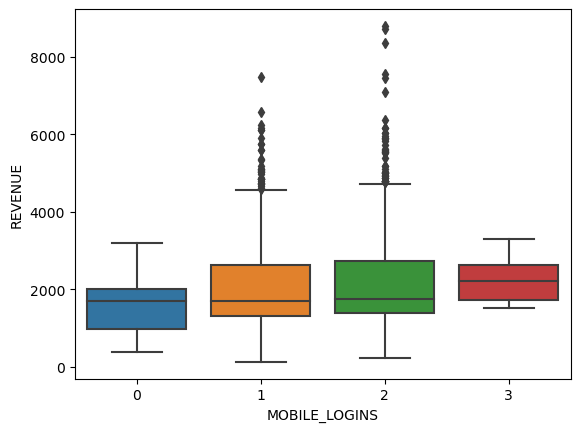

In [68]:
# Check boxplot REVENUE vs. MOBILE_LOGINS
sns.boxplot(y='REVENUE', x='MOBILE_LOGINS', data=df)
plt.show()

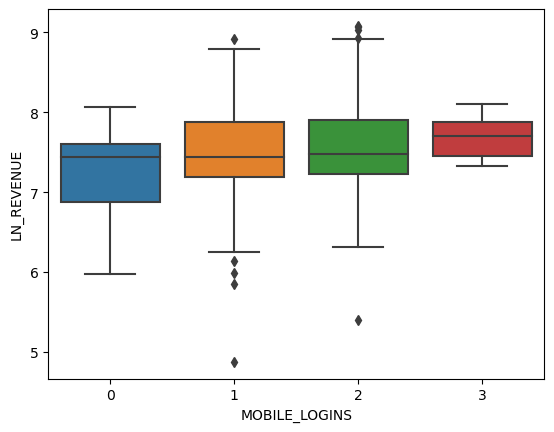

In [69]:
# Check boxplot LN_REVENUE vs. MOBILE_LOGINS
sns.boxplot(y='LN_REVENUE', x='MOBILE_LOGINS', data=df)
plt.show()

In [70]:
# Check MOBILE_LOGINS descriptive statistics by each value group.
df.groupby('MOBILE_LOGINS')['REVENUE'].agg(['mean', 'count', 'std']).round(decimals=2)

,mean,count,std
MOBILE_LOGINS,,,
0,1621.33,16,795.68
1,2038.84,999,1061.24
2,2188.24,919,1220.78
3,2255.25,12,591.08


In [71]:
# Build TOTAL_LOGINS using PC_LOGINS and MOBILE_LOGINS
df['TOTAL_LOGINS'] = df['PC_LOGINS'] + df['MOBILE_LOGINS']

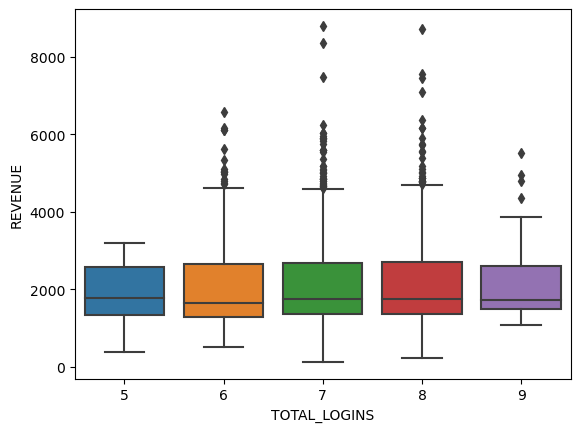

In [72]:
# Check boxplot REVNENUE vs. TOTAL_LOGINS
sns.boxplot(y='REVENUE', x='TOTAL_LOGINS', data=df)
plt.show()

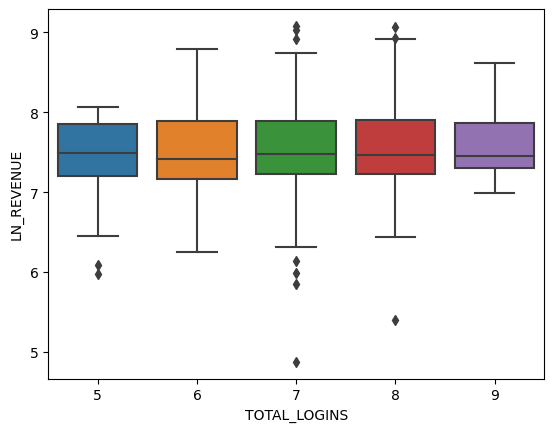

In [73]:
# Check boxplot LN_REVENUE vs. TOTAL_LOGINS
sns.boxplot(y='LN_REVENUE', x='TOTAL_LOGINS', data=df)
plt.show()

In [74]:
# Check TOTAL_LOGINS descriptive statistics by each value group.
df.groupby('TOTAL_LOGINS')['REVENUE'].agg(['mean', 'count', 'std']).round(decimals=2)

,mean,count,std
TOTAL_LOGINS,,,
5,1870.48,30,785.07
6,2026.01,487,1050.53
7,2107.26,927,1133.03
8,2193.72,472,1239.65
9,2304.84,30,1228.30


**Correlation with Engineered Features**

 - MOBILE_LOGINS has the most correlation coefficient on LN_REVENUE. 
 - TOTAL_LOGINS has more linearity than PC_LOGINS, but less than MOBILE_LOGINS.
 - All these LOGINS features do not have a stronger correlation coefficient on REVENUE.

In [75]:
# Check Correlation between revenue and original or engineered features.
df[['REVENUE', 'LN_REVENUE', 'PC_LOGINS', 'MOBILE_LOGINS', 'TOTAL_LOGINS']].corr(method='pearson')[['REVENUE', 'LN_REVENUE']].round(decimals=4)

,REVENUE,LN_REVENUE
REVENUE,1.0000,0.9471
LN_REVENUE,0.9471,1.0000
PC_LOGINS,0.0161,0.0108
MOBILE_LOGINS,0.0734,0.0785
TOTAL_LOGINS,0.0612,0.0607


### Weekly plan dummy Group
 - For analyzing the weekly plan variable, this study focused on the weekly plan's distribution, which has three different group division points. 
 - Distribution showed us that over 15 weeks have lower observations, and over two weeks have medium, zero to two have many numbers of observations.
 - So this study builds another dummy variable group named, WEEKLY_GRP, through those division points.
 - After then make dummy features from each value of WEEKLY_GRP, and evaluate each dummy's performance.

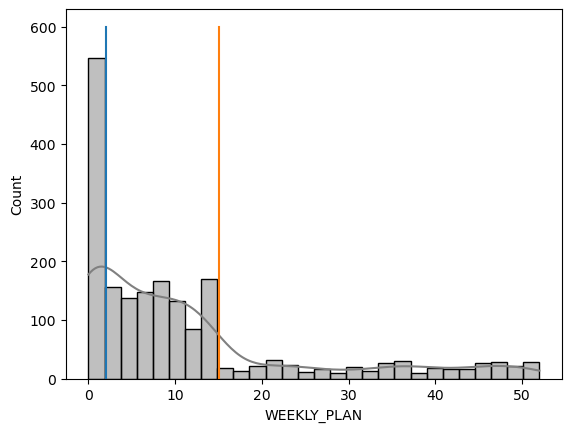

In [76]:
# Check WEEKLY PLAN histobgram, and division line on 2 weeks, and 15 weeks. 
sns.histplot(x='WEEKLY_PLAN', data=df, kde=True, color='gray')
plt.plot([2,2], [0,600])
plt.plot([15,15], [0,600])
plt.show()

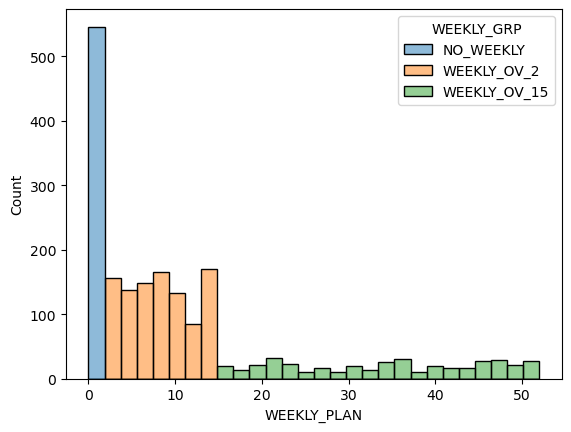

In [77]:
# Declare WEEKLY_GRP base
df['WEEKLY_GRP'] = 'NO_WEEKLY' # Actually it mans WEEKLY_PLAN = 0 and 1

# Loop for data
for index, row in df.iterrows():
    
    # Greater and equal to 15 goes WEEKLY_OV_15
    if row['WEEKLY_PLAN'] >= 15:
        df.loc[index, 'WEEKLY_GRP'] = 'WEEKLY_OV_15'
    # Greater and equqal to 2 goes WEEKLY_OV_2
    elif row['WEEKLY_PLAN'] >= 2:
        df.loc[index, 'WEEKLY_GRP'] = 'WEEKLY_OV_2'
    # Other else go to NO_WEEKLY. WEEKLY_PLAN in [0, 1]
    else:
        df.loc[index, 'WEEKLY_GRP'] = 'NO_WEEKLY'

# Check WEEKLY_PLAN's histogram with new feature
sns.histplot(x='WEEKLY_PLAN', hue='WEEKLY_GRP', data=df)
plt.show()

                 mean  count      std
WEEKLY_GRP                           
NO_WEEKLY     2149.72    546  1201.32
WEEKLY_OV_15  2184.74    404  1198.11
WEEKLY_OV_2   2052.62    996  1074.49


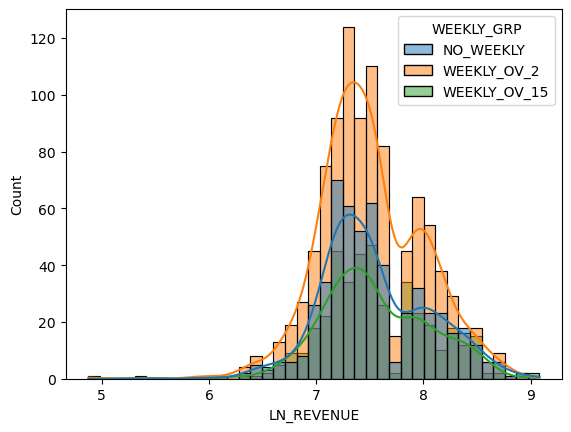

In [78]:
# Build dummies from WEEKLY_GRP
weekly_dm = pd.get_dummies(df['WEEKLY_GRP'])

# Check for rerun code
if 'NO_WEEKLY' in df.columns.to_list():
    df = df.drop(['NO_WEEKLY', 'WEEKLY_OV_15', 'WEEKLY_OV_2'], axis=1)
# Join new dummies to dataset.
df = df.join(weekly_dm)

# check descriptive statistics
print(df.groupby('WEEKLY_GRP')['REVENUE'].agg(['mean', 'count', 'std']).round(2))

# Check REVENUE's distribution with WEEKLY_GRP
sns.histplot(x='LN_REVENUE', hue='WEEKLY_GRP', data=df, kde=True)
plt.show()

**Correlation with Engineered Features**

 - Weekly plan does not have a stronger correlation coefficient on REVENUE and LN_REVENUE.
 - However, Weekly plan subscriptions over 15 weeks customers have a very weak positive correlation and Do not subscribe customers or one-time subscription customers has a positive way. 
 - But, Subscription over 2 weeks lass than 15 weeks customers has a negative correlation.

In [79]:
# Check Correlation between revenue and original or engineered features.
df[['REVENUE', 'LN_REVENUE', 'WEEKLY_PLAN', 'NO_WEEKLY', 'WEEKLY_OV_15', 'WEEKLY_OV_2']].corr(method='pearson').round(4)[['REVENUE', 'LN_REVENUE']]

,REVENUE,LN_REVENUE
REVENUE,1.0000,0.9471
LN_REVENUE,0.9471,1.0000
WEEKLY_PLAN,0.0098,0.0125
NO_WEEKLY,0.0233,0.0191
WEEKLY_OV_15,0.0348,0.0321
WEEKLY_OV_2,-0.0492,-0.0432


### Late deliveries dummy
 - LATE_DELIVERIES feature does not have a strong correlation with REVENUE, but this study assumes that if the customer has experienced Late deliveries, customer satisfaction declines and it effected to revenue negatively.
 - So this study builds a dummy variable of late deliveries.

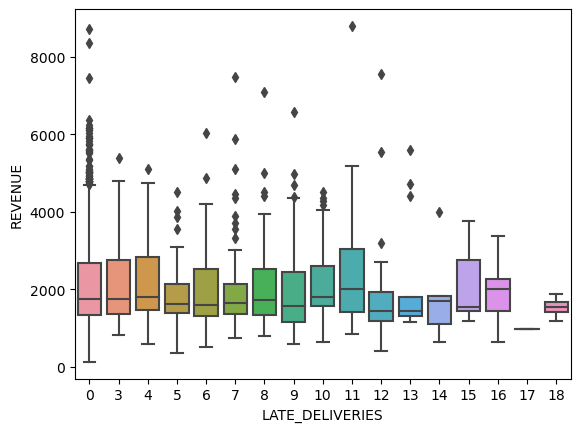

In [80]:
# Check boxplot REVENUE vs. LATE_DELIVERIES
sns.boxplot(y='REVENUE', x='LATE_DELIVERIES', data=df)
plt.show()

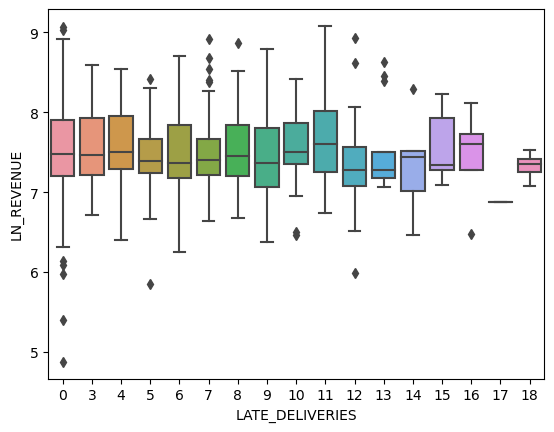

In [81]:
# Check boxplot LN_REVENUE vs. LATE_DELIVERIES
sns.boxplot(y='LN_REVENUE', x='LATE_DELIVERIES', data=df)
plt.show()

In [82]:
# Declare LATE_DELIVERIES dummy variable
df['LATE_DELIVERIES_YN'] = 0

# loop for checking
for index, row in df.iterrows():
    # if user has experience in case of late deliveries, then dummy has 1.
    if row['LATE_DELIVERIES'] > 0:
        df.loc[index, 'LATE_DELIVERIES_YN'] = 1

In [83]:
df.groupby('LATE_DELIVERIES_YN')[['REVENUE', 'LN_REVENUE']].agg(['mean', 'count', 'std']).round(2)

REVENUE                LN_REVENUE            
                       mean count      std       mean count   std
LATE_DELIVERIES_YN                                               
0                   2120.24  1433  1124.92       7.54  1433  0.49
1                   2071.13   513  1175.21       7.51   513  0.49

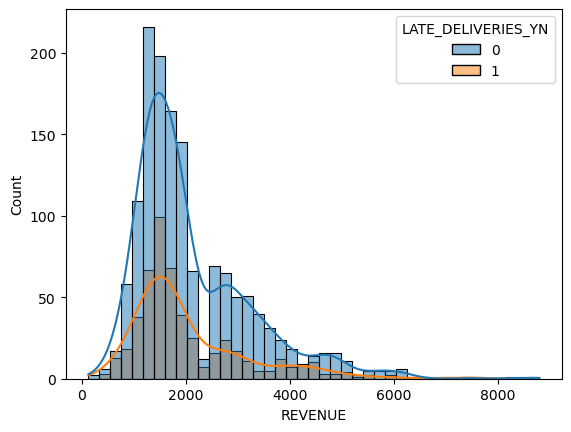

In [84]:
# check REVENUE's histogram with LATE_DELIVERIES_YN dummy
sns.histplot(x='REVENUE', hue='LATE_DELIVERIES_YN', data=df, kde=True)
plt.show()

**Correlation with Engineered Features**

 - Customers who have experience in case of late deliveries have lower mean REVENUE by 2,071.13 than does not 2,120.24.
 - But correlation coefficients of the non-dummy variable (-0.0340) has stronger than the dummy variable. (-0.0277)

In [85]:
# Check Correlation between revenue and original or engineered features.
df[['REVENUE', 'LN_REVENUE', 'LATE_DELIVERIES', 'LATE_DELIVERIES_YN']].corr(method='pearson')[['REVENUE', 'LN_REVENUE']].round(4)

,REVENUE,LN_REVENUE
REVENUE,1.0000,0.9471
LN_REVENUE,0.9471,1.0000
LATE_DELIVERIES,-0.0201,-0.0340
LATE_DELIVERIES_YN,-0.0190,-0.0277


### Average number of meals ordered per customer (LARGEST_ORDER_SIZE)
 - LARGEST_ORDER_SIZE feature has only 11 records and 1 and 11 have only 17 and 1 observations.
 - Moreover, this feature originally means the average number of meals ordered per customer. 
 - So, this study assumes that if a customer usually ordered once a week, 4 or 5 meals per order is the most conceptual order. Also, over 7 meals per order mean not only for a single customer.
 - Based on these assumptions, this study decided to combine both tails records. 1 goes to 2, and greater than 7 goes to 7. 

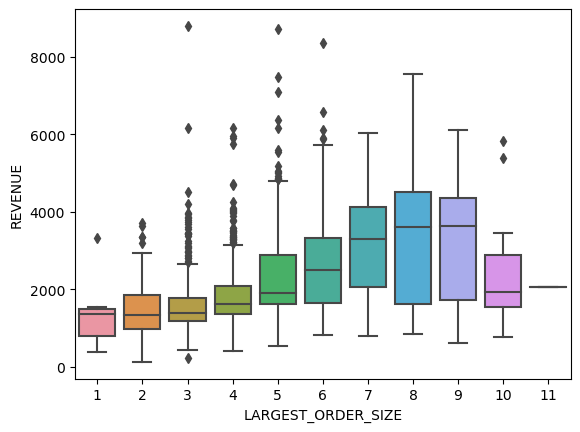

In [86]:
# Check boxploy REVENUE vs. LARGEST_ORDER_SIZE
sns.boxplot(y='REVENUE', x='LARGEST_ORDER_SIZE', data=df)
plt.show()

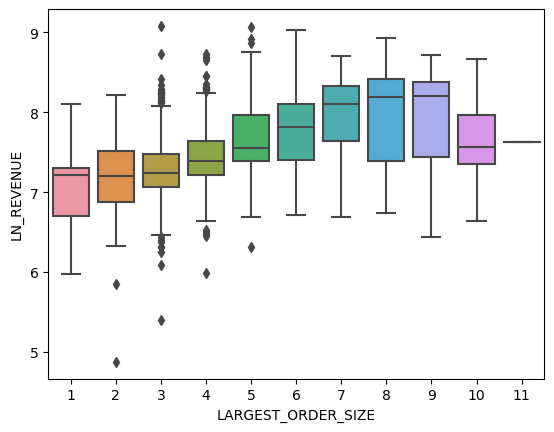

In [87]:
# Check boxplot LN_REVENUE vs. LARGEST_ORDER_SIZE
sns.boxplot(y='LN_REVENUE', x='LARGEST_ORDER_SIZE', data=df)
plt.show()

In [88]:
# Defined LARGEST_ORDER_SIZE_EDT as 0
df['LARGEST_ORDER_SIZE_EDT'] = 0

# loop for check variable
for index, row in df.iterrows():
    # If only one meal per oreder, combine with 2
    if row['LARGEST_ORDER_SIZE'] < 2:
        df.loc[index, 'LARGEST_ORDER_SIZE_EDT'] = 2
    # if ordered greater than 7 meals, combine with 7
    elif row['LARGEST_ORDER_SIZE'] > 7:
        df.loc[index, 'LARGEST_ORDER_SIZE_EDT'] = 7
    # other use as itself
    else:
        df.loc[index, 'LARGEST_ORDER_SIZE_EDT'] = row['LARGEST_ORDER_SIZE']

In [89]:
# Check desciprtive statistics
df.groupby('LARGEST_ORDER_SIZE')[['REVENUE', 'LN_REVENUE']].agg(['mean','count', 'std']).round(decimals=2)

REVENUE                LN_REVENUE            
                       mean count      std       mean count   std
LARGEST_ORDER_SIZE                                               
1                   1253.31    17   663.72       7.01    17  0.52
2                   1476.23   135   709.75       7.18   135  0.50
3                   1596.03   391   796.39       7.29   391  0.41
4                   1856.69   547   786.37       7.45   547  0.38
5                   2365.59   449  1127.91       7.67   449  0.43
6                   2630.15   236  1271.07       7.77   236  0.47
7                   3280.96    89  1351.63       7.99    89  0.48
8                   3457.68    49  1706.24       8.01    49  0.57
9                   3211.38    20  1563.92       7.91    20  0.65
10                  2496.52    12  1614.80       7.65    12  0.60
11                  2050.00     1      NaN       7.63     1   NaN

In [90]:
# Check desciprtive statistics
df.groupby('LARGEST_ORDER_SIZE_EDT')[['REVENUE', 'LN_REVENUE']].agg(['mean','count', 'std']).round(decimals=2)

REVENUE                LN_REVENUE            
                           mean count      std       mean count   std
LARGEST_ORDER_SIZE_EDT                                               
2                       1451.30   152   706.17       7.16   152  0.50
3                       1596.03   391   796.39       7.29   391  0.41
4                       1856.69   547   786.37       7.45   547  0.38
5                       2365.59   449  1127.91       7.67   449  0.43
6                       2630.15   236  1271.07       7.77   236  0.47
7                       3261.21   171  1507.09       7.96   171  0.54

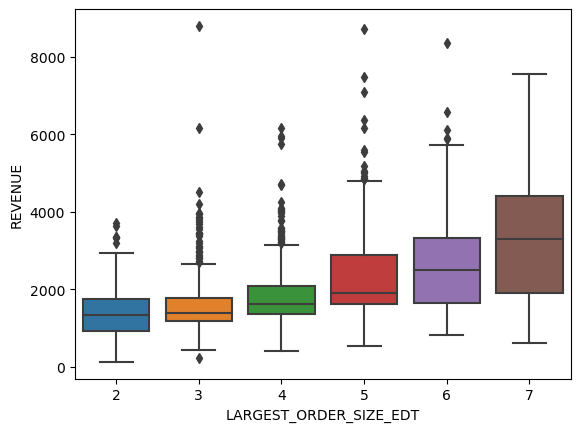

In [91]:
# Check bolplot REVENUE vs. new feature
sns.boxplot(y='REVENUE', x='LARGEST_ORDER_SIZE_EDT', data=df)
plt.show()

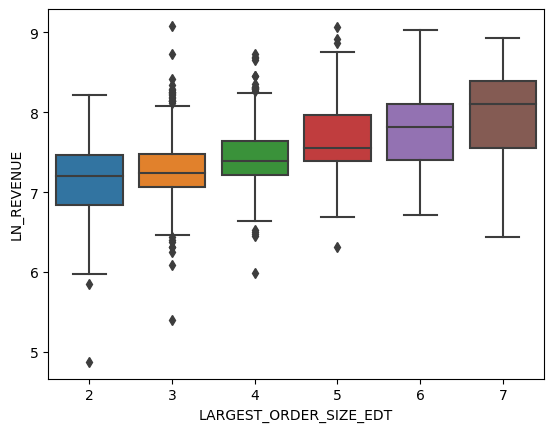

In [92]:
# Check bolplot LN_REVENUE vs. new feature
sns.boxplot(y='LN_REVENUE', x='LARGEST_ORDER_SIZE_EDT', data=df)
plt.show()

**Correlation with Engineered Features**

 - New feature LARGEST_ORDER_SIZE EDT has more correlation coefficient than before. (0.4639)

In [93]:
# Check Correlation between revenue and original or engineered features.
df[['REVENUE', 'LN_REVENUE', 'LARGEST_ORDER_SIZE', 'LARGEST_ORDER_SIZE_EDT']].corr(method='pearson')[['REVENUE', 'LN_REVENUE']].round(decimals=4)

,REVENUE,LN_REVENUE
REVENUE,1.0000,0.9471
LN_REVENUE,0.9471,1.0000
LARGEST_ORDER_SIZE,0.4351,0.4455
LARGEST_ORDER_SIZE_EDT,0.4464,0.4639


### Combine TOTAL_MEALS_ORDERED and LARGEST_ORDER_SIZE
 - TOTAL_MEALS_ORDERED means the total order counts per customer, and LARGEST_ORDER_SIZE means the Average meals per each order of each customer. 
 - So, TOTAL_MEALS_ORDERED muliply LARGEST_ORDER_SIZE means Number of "total orders X Average items in order = Total purchased Items."
 - In hence this study declared that TOTAL_MEALS is combined by TOTAL_MEALS_ORDERED multiply LARGEST_ORDER_SIZE. 

In [94]:
# Declare and calculate TOTAL_MEALS
df['TOTAL_MEALS'] = df['TOTAL_MEALS_ORDERED'] * df['LARGEST_ORDER_SIZE']

# Add Log scaled TOTAL_MEALS
df['LN_TOTAL_MEALS'] = np.log(df['TOTAL_MEALS'])

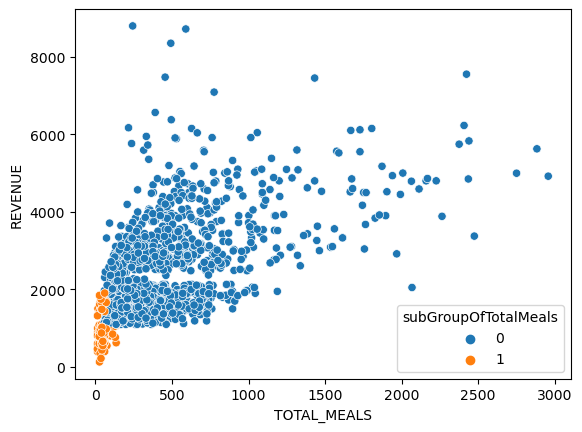

In [95]:
# Check Scatterplot of REVENUE vs. TOTAL_MEALS
sns.scatterplot(y='REVENUE', x='TOTAL_MEALS', hue='subGroupOfTotalMeals', data=df)
plt.show()

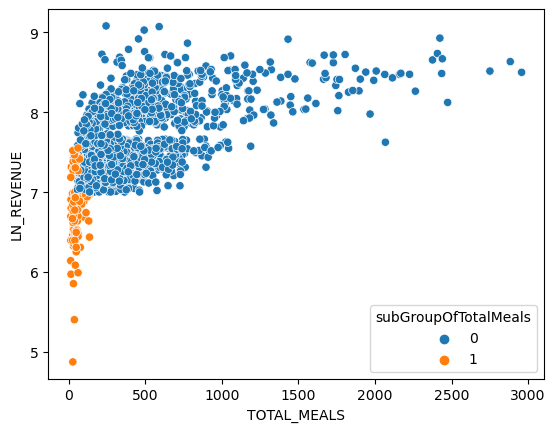

In [96]:
# Check scatterplt of LN_REVENU vs. TOTAL_MEALS
sns.scatterplot(y='LN_REVENUE', x='TOTAL_MEALS', hue='subGroupOfTotalMeals', data=df)
plt.show()

**Correlation with Engineered Features**

 - Check the correlation between all features that are made from TOTAL_MEALS_ORDERED AND LARGEST_ORDER_SIZE. 
 - LN_TOTAL_MEALS has the highest correlation coefficient on both REVENUE and LN_REVENUE.

In [97]:
# Check Correlation between revenue and original or engineered features.
df[['REVENUE', 'LN_REVENUE', 'TOTAL_MEALS_ORDERED', 'TOTAL_MEALS','LN_TOTAL_MEALS', 'LN_TOTAL_MEALS_ORDERED', 'LARGEST_ORDER_SIZE', 'LARGEST_ORDER_SIZE_EDT']].corr(method='pearson')[['REVENUE', 'LN_REVENUE']].round(decimals=4)

,REVENUE,LN_REVENUE
REVENUE,1.0000,0.9471
LN_REVENUE,0.9471,1.0000
TOTAL_MEALS_ORDERED,0.6005,0.6093
TOTAL_MEALS,0.6356,0.6152
LN_TOTAL_MEALS,0.6398,0.7173
LN_TOTAL_MEALS_ORDERED,0.6101,0.6943
LARGEST_ORDER_SIZE,0.4351,0.4455
LARGEST_ORDER_SIZE_EDT,0.4464,0.4639


***
# Correlation Test and Feature Selection
## Correlation Test

 - Check the correlation between REVENUE and all features.
 - The most Highest correlation coefficient is LN_TOTAL_MEALS (0.717) on both REVENUE and LN_REVENUE.
 - But second highest correlation coefficient is LN_TOTAL_MEALS_ORDERED (0.694) on LN_REVENU, but LN_AVG_TINME_PER_SITE_VISIT (0.630) on REVENUE.
 - So, this study has two steps of feature selection.

In [98]:
# Correlation Test 
# creates a correlation matrix for the numeric columns of the df DataFrame and sorts it by the correlation with the LOG_REVENUE column in descending order
df_corr = df._get_numeric_data().corr(method = 'pearson').round(3).sort_values(by='LN_REVENUE', ascending=False)

<AxesSubplot:>

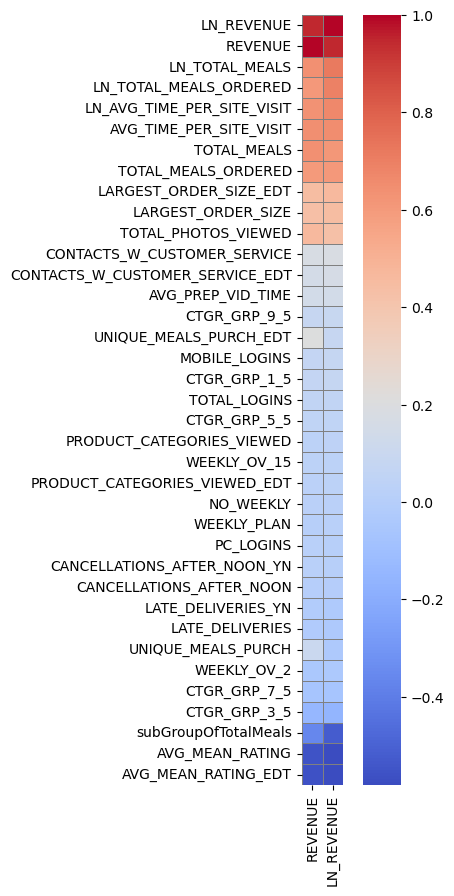

In [99]:
# Draw a chart 
fig = plt.figure(figsize = (5, 10))
sns.heatmap(data=df_corr.loc[:, ['REVENUE', 'LN_REVENUE']].sort_values(by='LN_REVENUE', ascending=False),
            cmap = 'coolwarm',
            square = True,
            annot = False,
            linecolor = 'gray',
            linewidths = 0.5
           )


In [100]:
# Correlation lists Check in Absolute number
df_corr.loc[:, ['REVENUE', 'LN_REVENUE']].apply('abs').sort_values(by='LN_REVENUE', ascending=False)

,REVENUE,LN_REVENUE
LN_REVENUE,0.947,1.000
REVENUE,1.000,0.947
LN_TOTAL_MEALS,0.640,0.717
LN_TOTAL_MEALS_ORDERED,0.610,0.694
LN_AVG_TIME_PER_SITE_VISIT,0.630,0.670
AVG_TIME_PER_SITE_VISIT,0.644,0.651
TOTAL_MEALS,0.636,0.615
TOTAL_MEALS_ORDERED,0.600,0.609
AVG_MEAN_RATING_EDT,0.558,0.581
AVG_MEAN_RATING,0.554,0.578


### Full Model's Feature lists

In [101]:
# Full Features list
x_full = [
    # TOTAL_MEALS_ORDERED based Features
    'TOTAL_MEALS_ORDERED', 'LN_TOTAL_MEALS_ORDERED',
    'UNIQUE_MEALS_PURCH', 'UNIQUE_MEALS_PURCH_EDT',
    'LARGEST_ORDER_SIZE', 'LARGEST_ORDER_SIZE_EDT',
    'TOTAL_MEALS', 'LN_TOTAL_MEALS',
    'subGroupOfTotalMeals',
    
    # Contacts customer service based Features
    'CONTACTS_W_CUSTOMER_SERVICE', 'CONTACTS_W_CUSTOMER_SERVICE_EDT',
    
    # Product Categories viewed based features
    'PRODUCT_CATEGORIES_VIEWED', 'PRODUCT_CATEGORIES_VIEWED_EDT',
    'CTGR_GRP_1_5', 'CTGR_GRP_3_5', 'CTGR_GRP_5_5', 'CTGR_GRP_7_5', 'CTGR_GRP_9_5',
    
    # Cancellations after noon based features
    'CANCELLATIONS_AFTER_NOON', 'CANCELLATIONS_AFTER_NOON_YN',
    
    # Late Deliveries based features
    'LATE_DELIVERIES', 'LATE_DELIVERIES_YN',
    
    # Logins information based features
    'PC_LOGINS', 'MOBILE_LOGINS', 'TOTAL_LOGINS',
    
    # Weekly plan based features
    'WEEKLY_PLAN', 'NO_WEEKLY', 'WEEKLY_OV_15', 'WEEKLY_OV_2',
    
    # Rating based features
    'AVG_MEAN_RATING','AVG_MEAN_RATING_EDT',
    
    # Original features
    'AVG_TIME_PER_SITE_VISIT', 'LN_AVG_TIME_PER_SITE_VISIT',
    'AVG_PREP_VID_TIME',
    'TOTAL_PHOTOS_VIEWED',
 ]

### Researcher selected Features
 - x_var_ln: Features for Log scaled REVENUE.
 - x_var: Features for original REVENUE.

In [102]:
# X features for LN(y)
x_var_ln = [
    'LN_TOTAL_MEALS_ORDERED',
    'AVG_TIME_PER_SITE_VISIT',
    'LARGEST_ORDER_SIZE_EDT',
    'AVG_MEAN_RATING_EDT',
    'TOTAL_PHOTOS_VIEWED',
    'subGroupOfTotalMeals',
    'CONTACTS_W_CUSTOMER_SERVICE',
    'CTGR_GRP_3_5',
    'AVG_PREP_VID_TIME',
    'CTGR_GRP_9_5',
    'UNIQUE_MEALS_PURCH_EDT',
    'MOBILE_LOGINS',
    'CTGR_GRP_1_5',
    'CTGR_GRP_7_5', 
    'WEEKLY_OV_2',
    'LATE_DELIVERIES',
    'WEEKLY_OV_15',
    'CANCELLATIONS_AFTER_NOON_YN',
 ]

In [103]:
# X features for y
x_var = [
    'AVG_TIME_PER_SITE_VISIT',
    'LN_TOTAL_MEALS_ORDERED',
    'LARGEST_ORDER_SIZE_EDT',
    'AVG_MEAN_RATING_EDT',
    'subGroupOfTotalMeals',
    'TOTAL_PHOTOS_VIEWED',
    'UNIQUE_MEALS_PURCH_EDT',
    'CONTACTS_W_CUSTOMER_SERVICE',
    'AVG_PREP_VID_TIME',
    'CTGR_GRP_3_5',
    'CTGR_GRP_9_5',
    'MOBILE_LOGINS',
    'CTGR_GRP_1_5',
    'CTGR_GRP_7_5', 
    'WEEKLY_OV_2',
    'WEEKLY_OV_15',
    'LATE_DELIVERIES',
    'CANCELLATIONS_AFTER_NOON_YN',
 ]

***
# Predict models demonstration

## Preparing to build fitted model
### Importing related libraries

In [104]:
# Model Selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

### Result Set List Declaration
 - To evaluate each model's score, this study declared resultSet and collected every result of models. 
 - Result Dictionary:
   - name: Model's name.
   - score: Model's test score.
   - train Score: Model's training score.
   - params: Model's best fitted hyper parameters.
   - model: Instantiated Model
   - y: Data set of target variable.
   - x: Data set of features.

In [105]:
# Declare Result set list
# resultSet = [{'name': model_name, 'score': test_score, 'train_score': train_score, 'params': params, 'model': model, 'y': y_data, 'x': x_data}]
resultSet = []

### Basic parameter of this course.
 - Random State is 219, it was defined by requirement.
 - Test Size Rate is 0.25, it was defined by requirement.

In [106]:
# Declare Assignment Condition
# Criterion 1 – Train-Test Gap
# In train-test split, make sure your random_state is set to 219 and your test_size is set to 0.25.
randomState = 219
testSize = 0.25

### Feature importance visualizing function
 - From class material. Visualize each features importance.

In [107]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

### Fitted feature selector for Lasso CV
 - Check to Lasso CV Model's coefficients data frame and return new features after evaluating.

In [108]:
###############################################################################
# USER DEFINED FUNCTION
###############################################################################
def fittedFeatureSelect(coef_df):
    """
    Check to Lasso CV Model's coefficients data frame and return new features after evaluating.
    
    
    PARAMETERS
    ----------
    coef_df: Lasso().fit() model's coefficient zipped dataframe
    """
    # Return variable Declaration
    x_new = []
    
    # First loop for checking coefficients
    for i, a in coef_df.loc[1:, :].iterrows():
        
        # Check Coefficient is equal to 0 or not.
        if abs(a['Coefficient']) != 0:
            # Check Feature name
            thisFeature = a['Feature']
            # Check Feature's coefficient
            thisCoef = a['Coefficient']
            # Check for NOT duplication in result set.
            noDup = True
            # Second loop for compare other features, which has same name except _EDT or _YN
            for j, b in coef_df.loc[1:, :].iterrows():
                # Check Coefficient is qual to 0 or not
                if abs(b['Coefficient']) != 0:
                    # Check the name similarity. E.g. Column named X is in X_edt or X_yn,
                    # It prevent to put two or more same variables, which has only logarithm converting or dummy converting, in same model.
                    if (thisFeature in b['Feature'] or b['Feature'] in thisFeature) and thisFeature != b['Feature']:
                        # If there is similar column name, noDup goes to False.
                        noDup = False
                        # Check those variables' coefficient, and higher is selected.
                        if abs(thisCoef) > abs(b['Coefficient']):
                            # Checking for already selected in new column list.
                            if thisFeature not in x_new:
                                # append to new column list
                                x_new.append(thisFeature)
                                break
                            else:
                                pass
                        elif abs(thisCoef) < abs(b['Coefficient']):
                            if b['Feature'] not in x_new:
                                x_new.append(b['Feature'])
                                break
                            else:
                                pass
                        else: 
                            pass
                    else:
                        pass
                else:
                    pass
            # If this variable has no duplicated column name, put it in new column list.
            if noDup and thisFeature not in x_new:
                x_new.append(thisFeature)
            else: 
                pass
        else:
            pass
    # Return Result.
    return x_new

## Declaration of target variable(y) and features (x)

In [109]:
# preparing y-variable vs. x-full
y_f = df['REVENUE'] # y-variable
x_f = df[x_full] # x-features

In [110]:
# preparing y-variable vs. x-full
y_f_ln = df['LN_REVENUE'] # y-variable
x_f_ln = df[x_full] # x-features

In [111]:
# preparing y-variable
y = df['REVENUE'] # y-variable
x = df[x_var] # x-features

In [112]:
# preparing ln y-variable
y_log = df['LN_REVENUE'] # y-variable
x_log = df[x_var_ln] # x-features

## Set training dataset and test dataset for original REVENUE and LN REVENUE

In [113]:
# Train-Test set for y vs. x-full
# train-test split.Prepare train-test split for statsmodels.
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_f, y_f, 
        test_size=testSize, 
        shuffle=True, 
        random_state=randomState)

In [114]:
# Train-Test set for LN-y vs. x_full
# train-test split.Prepare train-test split for statsmodels.
x_train_f_ln, x_test_f_ln, y_train_f_ln, y_test_f_ln = train_test_split(x_f_ln, y_f_ln, 
        test_size=testSize, 
        shuffle=True, 
        random_state=randomState)

In [115]:
# Train-Test set for y vs. x
# train-test split.Prepare train-test split for statsmodels.
x_train, x_test, y_train, y_test = train_test_split(x, y, 
        test_size=testSize, 
        shuffle=True, 
        random_state=randomState)

In [116]:
# Train-Test set for LN-y vs. x-ln
# train-test split.Prepare train-test split for statsmodels.
x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(x_log, y_log, 
        test_size=testSize, 
        shuffle=True, 
        random_state=randomState)

## Linear Regression Modeling

### Linear Regression Model summary
 - In Linear Regression Model, this study put all features into the REVENUE models and LN_REVENUE model, and call it the FULL MODEL. And FULL MODEL run as Lasso Regression with Cross Validating.
 - After cross-validating both models, this study defined a function, which can evaluate every feature using feature importances of the model, and select the best important features from the result. 
 - Lastly, build a new model with Lasso Regression with selected features.

### Lasso Cross Validating model Hyper parameters
 - Check alpha from 0.001 to 6.000. 

In [117]:
# Hyperparameters
arange = []
for i in range(1, 6000):
    arange.append(i/1000)

### Fitted model results

 - Lass Regression Original Y vs. Selected X

 - Lass Regression Original LN(Y) vs. Selected X


Most Fitted Alpha
Alpha: 2.591

FULL MODEL
Model Name:     Lasso Regression - y vs. full x
Train_Score:    0.672
Test_Score:     0.688
Train-Test Gap: 0.016

    |
   \ /
    V

ADJUSTED MODEL
Model Name:     Lasso Regression - y vs. Selected x
Train_Score:    0.654
Test_Score:     0.671
Train-Test Gap: 0.017

Coefficents
-----------
                        Feature  Coefficient
0                     intercept      348.936
1        LN_TOTAL_MEALS_ORDERED       22.523
2                LN_TOTAL_MEALS        0.000
3        UNIQUE_MEALS_PURCH_EDT      137.686
4            LARGEST_ORDER_SIZE      -78.604
5           TOTAL_MEALS_ORDERED        5.063
6          subGroupOfTotalMeals     -781.943
7   CONTACTS_W_CUSTOMER_SERVICE       75.735
8                  CTGR_GRP_1_5       50.352
9                  CTGR_GRP_3_5      -53.649
10                 CTGR_GRP_7_5       -5.616
11                 CTGR_GRP_9_5       43.815
12  CANCELLATIONS_AFTER_NOON_YN        0.000
13           LATE_DELIVERIES_YN  

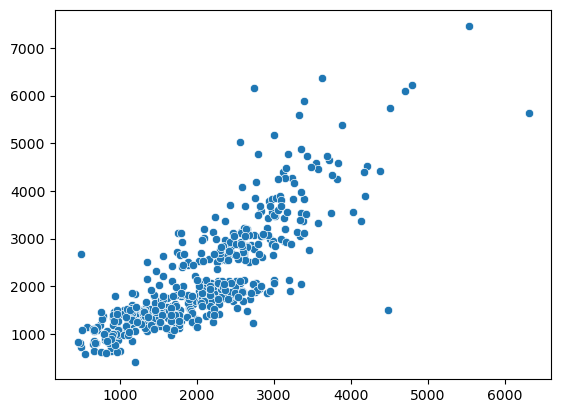

In [118]:
# Model selection
model = LassoCV(cv=5, random_state=219, alphas=arange, n_jobs=-1, max_iter=10000)
# Model name set
model_name = 'Lasso Regression - y vs. full x'
# Linear regression model is trained on the training data using the "fit" method of the "LinearRegression" class. 
model.fit(x_f, y_f)

# The model is then used to make predictions on the test data using the "predict" method, which is stored in the "y_pred" variable.
model_pred = model.predict(x_test_f)

# The model performance is evaluated by calculating the training score and testing score using the "score" method.
model_train_score = model.score(x_train_f, y_train_f).round(3)
model_test_score = model.score(x_test_f, y_test_f).round(3)
model_gap = abs(model_train_score - model_test_score).round(3)

# zipping each feature name to its coefficient
model_coefficients = zip(x_train_f.columns, model.coef_.round(decimals = 3))

# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 3))]

# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
coef_df = pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])

# dynamically printing results
print(f"""
Most Fitted Alpha
======================
Alpha: {model.alpha_}
=======================
""")
alp = model.alpha_
ols_model =  f"""\
FULL MODEL
=====================================
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

    |
   \ /
    V
"""

print(ols_model)

x_f_new = fittedFeatureSelect(coef_df)

x_f_new = df[x_f_new] # x-features

# Train-Test set for y vs. x-full
# train-test split.Prepare train-test split for statsmodels.
x_train_f2, x_test_f2, y_train_f2, y_test_f2 = train_test_split(x_f_new, y_f, 
        test_size=testSize, 
        shuffle=True, 
        random_state=randomState)

# Linear regression model is trained on the training data using the "fit" method of the "LinearRegression" class. 
model = Lasso(alpha=alp)
model.fit(x_train_f2, y_train_f2)

# The model is then used to make predictions on the test data using the "predict" method, which is stored in the "y_pred" variable.
model_pred = model.predict(x_test_f2)

# The model performance is evaluated by calculating the training score and testing score using the "score" method.
model_train_score = model.score(x_train_f2, y_train_f2).round(3)
model_test_score = model.score(x_test_f2, y_test_f2).round(3)
model_gap = abs(model_train_score - model_test_score).round(3)

# zipping each feature name to its coefficient
model_coefficients = zip(x_train_f2.columns, model.coef_.round(decimals = 3))

# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 3))]

# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
coef_df = pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])

# dynamically printing results
ols_model =  f"""\
ADJUSTED MODEL
=====================================
Model Name:     Lasso Regression - y vs. Selected x
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{coef_df}

"""

print(ols_model)

sns.scatterplot(y=y_test_f2.values, x=model_pred.reshape(-1).tolist())
plt.show()

# Store result on resultset
result = {
    'name': 'Lasso Regression - y vs. Selected x    ', 
    'score': model_test_score, 
    'train_score': model_train_score, 
    'params': alp, 
    'model': model,
    'y': y_test_f2,
    'x': model_pred
}
resultSet.append(result)


Most Fitted Alpha
Alpha: 0.002

FULL MODEL
Model Name:     Lasso Regression - LN(y) vs. full x
Train_Score:    0.724
Test_Score:     0.717
Train-Test Gap: 0.007

    |
   \ /
    V

ADJUSTED MODEL
Model Name:     Lasso Regression - y vs. Selected x
Train_Score:    0.712
Test_Score:     0.716
Train-Test Gap: 0.004

Coefficents
-----------
                        Feature  Coefficient
0                     intercept        4.495
1           TOTAL_MEALS_ORDERED        0.002
2        UNIQUE_MEALS_PURCH_EDT        0.061
3            LARGEST_ORDER_SIZE       -0.034
4                LN_TOTAL_MEALS        0.039
5          subGroupOfTotalMeals       -0.559
6   CONTACTS_W_CUSTOMER_SERVICE        0.031
7                  CTGR_GRP_1_5        0.000
8                  CTGR_GRP_3_5       -0.030
9                  CTGR_GRP_7_5       -0.008
10     CANCELLATIONS_AFTER_NOON       -0.001
11                    PC_LOGINS       -0.000
12                  WEEKLY_OV_2       -0.017
13          AVG_MEAN_RATING_E

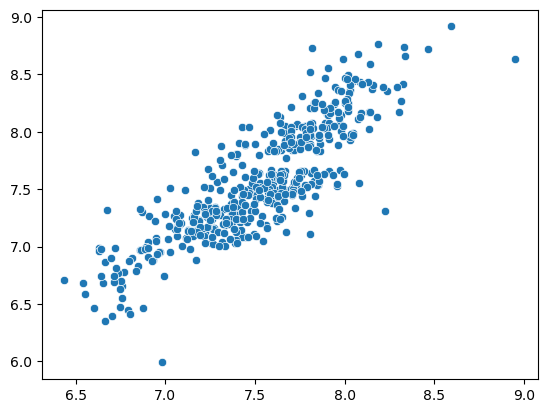

In [119]:
# Model selection
model = LassoCV(cv=5, random_state=219, alphas=arange, n_jobs=-1, max_iter=10000)
# Model name set
model_name = 'Lasso Regression - LN(y) vs. full x'
# Linear regression model is trained on the training data using the "fit" method of the "LinearRegression" class. 
model.fit(x_train_f_ln, y_train_f_ln)

# The model is then used to make predictions on the test data using the "predict" method, which is stored in the "y_pred" variable.
model_pred = model.predict(x_test_f_ln)

# The model performance is evaluated by calculating the training score and testing score using the "score" method.
model_train_score = model.score(x_train_f_ln, y_train_f_ln).round(3)
model_test_score = model.score(x_test_f_ln, y_test_f_ln).round(3)
model_gap = abs(model_train_score - model_test_score).round(3)

# zipping each feature name to its coefficient
model_coefficients = zip(x_train_f_ln.columns, model.coef_.round(decimals = 3))

# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 3))]

# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
coef_df = pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])

# dynamically printing results
print(f"""
Most Fitted Alpha
======================
Alpha: {model.alpha_}
=======================
""")
alp = model.alpha_
ols_model =  f"""\
FULL MODEL
=====================================
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

    |
   \ /
    V
"""

print(ols_model)

x_f_ln_new = fittedFeatureSelect(coef_df)

x_f_ln_new = df[x_f_ln_new] # x-features

# Train-Test set for LN-y vs. x_full
# train-test split.Prepare train-test split for statsmodels.
x_train_f_ln2, x_test_f_ln2, y_train_f_ln2, y_test_f_ln2 = train_test_split(x_f_ln_new, y_f_ln, 
        test_size=testSize, 
        shuffle=True, 
        random_state=randomState)

# Linear regression model is trained on the training data using the "fit" method of the "LinearRegression" class. 
model = Lasso(alpha=alp)
model.fit(x_train_f_ln2, y_train_f_ln2)

# The model is then used to make predictions on the test data using the "predict" method, which is stored in the "y_pred" variable.
model_pred = model.predict(x_test_f_ln2)

# The model performance is evaluated by calculating the training score and testing score using the "score" method.
model_train_score = model.score(x_train_f_ln2, y_train_f_ln2).round(3)
model_test_score = model.score(x_test_f_ln2, y_test_f_ln2).round(3)
model_gap = abs(model_train_score - model_test_score).round(3)

# zipping each feature name to its coefficient
model_coefficients = zip(x_train_f_ln2.columns, model.coef_.round(decimals = 3))

# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 3))]

# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
coef_df = pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])

# dynamically printing results
ols_model =  f"""\
ADJUSTED MODEL
=====================================
Model Name:     Lasso Regression - y vs. Selected x
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{coef_df}

"""
print(ols_model)

sns.scatterplot(y=y_test_f_ln2.values, x=model_pred.reshape(-1).tolist())
plt.show()

# Store result on resultset
result = {
    'name': 'Lasso Regression - LN(y) vs. Selected x', 
    'score': model_test_score, 
    'train_score': model_train_score, 
    'params': alp, 
    'model': model,
    'y': y_test_f_ln2,
    'x': model_pred
}
resultSet.append(result)

## Random forest regressor model
### Random forest regressor hyper parameters 
 - Define the Regressor score sets list.
 - To Evaluate every four models, every result is stored in a dictionary list.
 - Score Dictionary
   - model_name: Performed model name. 
   - score: result score of Cross Validating, model.best_score_.
   - param: result best parameter set of Cross Validating, model.best_params_.
   - x: Features data set of Cross Validating Model.
   - y: Target variable data set of Cross Validating Model

In [120]:
# Regressor ScoreSets
# {'model_name': model_name, 'score': best_score_, 'param': best_params_, 'x': x_data', 'y': y_data}
scoreSet = []

 - Hyper parameter ranges.
 - To decline runtime, this study commented actual parameter range.
 - The defined range is the best-fitted parameter after running cross-validating.

In [121]:
# declaring a hyperparameters for random forest
n_estimators_range        = [150, 170, 180, 190, 200, 210, 220, 230, 240,] #[190]    # [150, 170, 180, 190, 200, 210, 220, 230, 240,]
min_samples_split_range   = [2, 3, 4] #[2]      # [2, 3, 4]
max_depth_range           = [4, 5, 6, 7, 8, 9, 10] #[8]      # [4, 5, 6, 7, 8, 9, 10]
min_samples_leaf_range    = [15, 20, 25, 30, 35] #[20]     # [15, 20, 25, 30, 35]
warm_start_range          = [True, False] #[False]  # [True, False]

# creating a hyperparameter grid for random forest
param_grid = {
    'n_estimators'      : n_estimators_range,
    'min_samples_split' : min_samples_split_range,
    'max_depth': max_depth_range,
    'min_samples_leaf': min_samples_leaf_range,
    'warm_start': warm_start_range,
}

### Random forest regressor model cross validation

In [122]:
# Random Forest Regressor Cross Validating - y vs. Selected X
# INSTANTIATING the model object without hyperparameters
tuned_forest = RandomForestRegressor(random_state = randomState)

# RandomizedSearchCV object
randforest_model_cv = RandomizedSearchCV(estimator           = tuned_forest,
                                         param_distributions = param_grid,
                                         n_iter              = 1,
                                         cv                  = 5,
                                         random_state        = randomState)


# FITTING to the FULL DATASET (due to cross-validation)
randforest_model_cv.fit(x, y)

# printing the optimal parameters and best score
print(f"Tuned Parameters: {randforest_model_cv.best_params_}")
print(f"Tuned R-Square:   {randforest_model_cv.best_score_.round(decimals=4)}")

# Store Data result
score_dic = {
    'model_name': 'Random Forest Regressor - y vs. Selected X',
    'score': randforest_model_cv.best_score_,
    'param': randforest_model_cv.best_params_,
    'x': x,
    'y': y
}
scoreSet.append(score_dic)

Tuned Parameters: {'warm_start': False, 'n_estimators': 230, 'min_samples_split': 2, 'min_samples_leaf': 25, 'max_depth': 9}
Tuned R-Square:   0.6698


In [123]:
# Random Forest Regressor Cross Validation - LN (y) vs. Selected X
# INSTANTIATING the model object without hyperparameters
tuned_forest = RandomForestRegressor(random_state = randomState)

# RandomizedSearchCV object
randforest_model_cv = RandomizedSearchCV(estimator           = tuned_forest,
                                         param_distributions = param_grid,
                                         n_iter              = 1,
                                         cv                  = 5,
                                         random_state        = randomState)


# FITTING to the FULL DATASET (due to cross-validation)
randforest_model_cv.fit(x_log, y_log)

# printing the optimal parameters and best score
print(f"Tuned Parameters: {randforest_model_cv.best_params_}")
print(f"Tuned R-Square:   {randforest_model_cv.best_score_.round(decimals=4)}")

# Store Data result
score_dic = {
    'model_name': 'Random Forest Regressor - LN(y) vs. Selected X',
    'score': randforest_model_cv.best_score_,
    'param': randforest_model_cv.best_params_,
    'x': x_log,
    'y': y_log
}
scoreSet.append(score_dic)

Tuned Parameters: {'warm_start': False, 'n_estimators': 230, 'min_samples_split': 2, 'min_samples_leaf': 25, 'max_depth': 9}
Tuned R-Square:   0.6894


### Most fitted parameter model result

In [124]:
# Check the best model
best = dict

print(f"""Model Name\t\t\t\t\t\tModel Score""")
for dic in scoreSet:
    highest = True
    for compareDic in scoreSet:
        if dic['model_name'] != compareDic['model_name']:
            #print(dic['model_name'], ' : ', dic['score'].round(3), ' < ', compareDic['model_name'], ' : ', compareDic['score'].round(3))
            if dic['score'] < compareDic['score']:
                highest = False

    if highest:
        best = dic
    print(f"""{dic['model_name']}\t\t{dic['score'].round(3)}""")

print('Best Model is', best['model_name'])

Model Name						Model Score
Random Forest Regressor - y vs. Selected X		0.67
Random Forest Regressor - LN(y) vs. Selected X		0.689
Best Model is Random Forest Regressor - LN(y) vs. Selected X


In [125]:
# Train-Test set for y vs. x
# train-test split.Prepare train-test split for statsmodels.
x_train, x_test, y_train, y_test = train_test_split(best['x'], best['y'], 
        test_size=testSize, 
        shuffle=True, 
        random_state=randomState)

Model Name:     Random Forest Regressor - LN(y) vs. Selected X
Train_Score:    0.7993
Test_Score:     0.7783
Train-Test Gap: 0.021



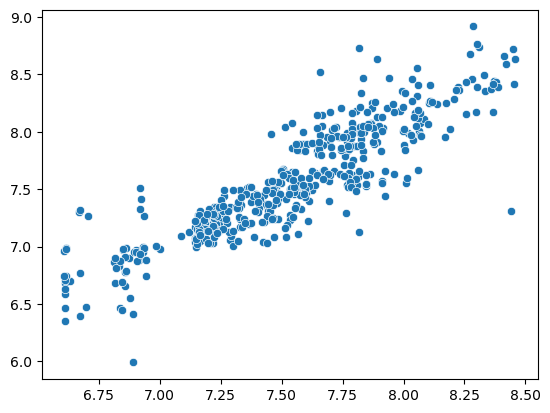

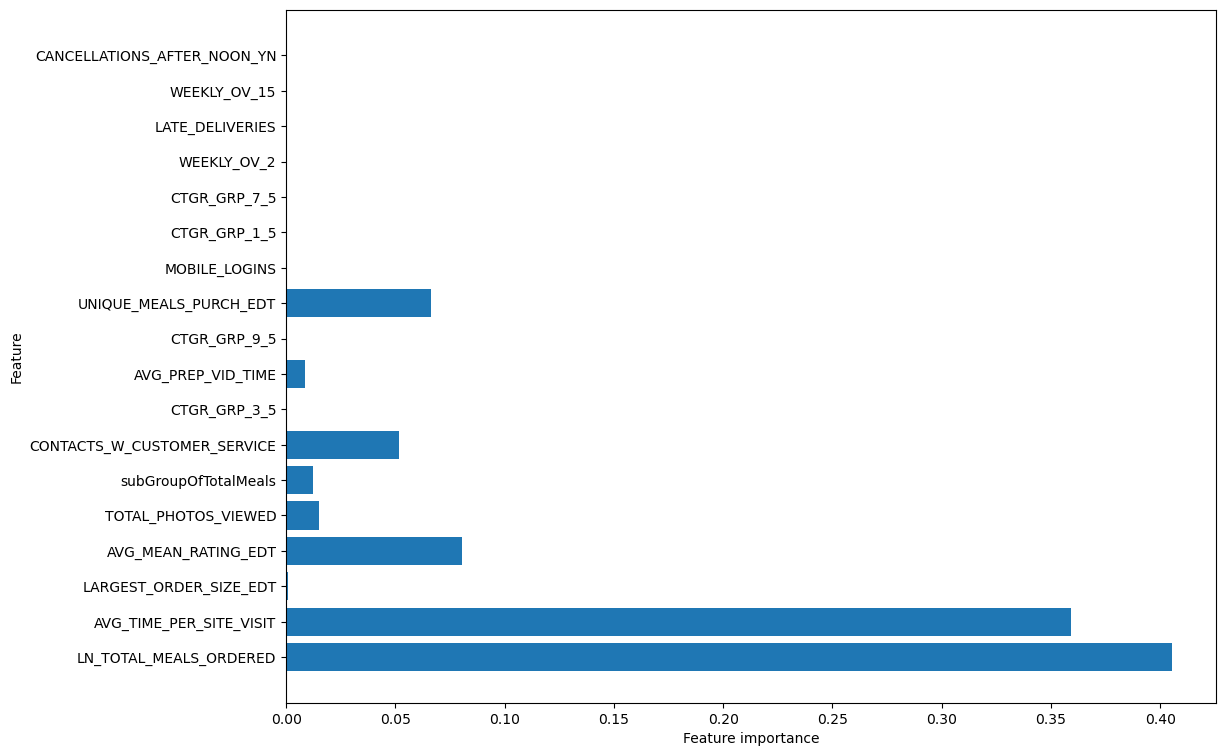

In [126]:
# Run Final Model
model_name = best['model_name']
rf = RandomForestRegressor(n_estimators     = best['param']['n_estimators'],
                              criterion        = 'squared_error',
                              max_depth        = best['param']['max_depth'],
                              min_samples_leaf = best['param']['min_samples_leaf'],
                              min_samples_split = best['param']['min_samples_split'],
                              bootstrap        = True,
                              warm_start       = best['param']['warm_start'],
                              random_state     = randomState)
# Fit Final Model
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

# The model performance is evaluated by calculating the training score and testing score using the "score" method.
model_train_score = rf.score(x_train, y_train).round(4)
model_test_score = rf.score(x_test, y_test).round(4)
model_gap = abs(model_train_score - model_test_score).round(4)

# dynamically printing results
rf_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(rf_model)

sns.scatterplot(y=y_test.values, x=rf_pred.reshape(-1).tolist())
plt.show()

plot_feature_importances(rf,
                         train = x_train,
                         export = False)

# Store result on resultset
result = {
    'name': model_name, 
    'score': model_test_score, 
    'train_score': model_train_score, 
    'params': best['param'],
    'x': y_test,
    'y': rf_pred
}
resultSet.append(result)

# Conclusion
## Most scored model

In [127]:
# Check the best model
best = dict

print(f"""Model Name\t\t\t\t\t\tModel Score""")
for dic in resultSet:
    highest = True
    for compareDic in resultSet:
        if dic['name'] != compareDic['name']:
            #print(dic['model_name'], ' : ', dic['score'].round(3), ' < ', compareDic['model_name'], ' : ', compareDic['score'].round(3))
            if dic['score'] < compareDic['score']:
                highest = False

    if highest:
        best = dic
    print(f"""{dic['name']}\t\t\t{dic['score'].round(3)}""")

print('Best Model is', best['name'])

Model Name						Model Score
Lasso Regression - y vs. Selected x    			0.671
Lasso Regression - LN(y) vs. Selected x			0.716
Random Forest Regressor - LN(y) vs. Selected X			0.778
Best Model is Random Forest Regressor - LN(y) vs. Selected X


## Result of the most fitted Model and Score
 - Final Model is Random Forest Regressor.
 - It could explain 77.8% of the test data and 79.9% of the training data.
 - The Train-Test score gap is 0.021, it is less than 0.05. 

Final Model

Model Name:     Random Forest Regressor - LN(y) vs. Selected X

--------------------------------------------------------------

Train_Score:    0.799

Test_Score:     0.778

-------------------------------------

Train-Test Gap: 0.021






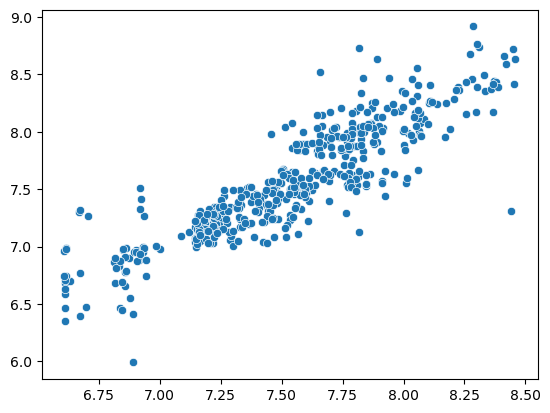

Total Running Time: 31.0 seconds.


In [128]:
# dynamically printing results
rf_model =  f"""\
Final Model
==============================================================

Model Name:     {best['name']}

--------------------------------------------------------------

Train_Score:    {best['train_score'].round(3)}

Test_Score:     {best['score'].round(3)}

-------------------------------------

Train-Test Gap: {round(abs(best['train_score'] - best['score']), 4)}

==============================================================


"""
print(rf_model)

sns.scatterplot(y=best['x'].values, x=best['y'].reshape(-1).tolist())
plt.show()

endTime = time.time()
runningTime = endTime - startTime
print(f"Total Running Time: {round(runningTime, 0)} seconds.")